In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean
from sklearn.model_selection import learning_curve

from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

import catboost as cb

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
dataset

,Number of atoms,Relative number of N atoms,Relative number of Cl atoms,Wiener index,Kier&Hall index (order 3),Average Information content (order 0),Balaban index,Max partial charge for a N atom [Zefirov's PC],Min partial charge for a N atom [Zefirov's PC],Polarity parameter / square distance,...,Max net atomic charge for a C atom,Tot dipole of the molecule,Image of the Onsager-Kirkwood solvation energy,RNCS Relative negative charged SA (SAMNEG*RNCG) [QC PC],Max SIGMA-SIGMA bond order,Max PI-PI bond order,Min valency of a N atom,Avg valency of a N atom,Min (0.1) bond order of a N atom,Act
Structure,,,,,,,,,,,,,,,,,,,,,
"""1Co""",101,0.0297,0.0198,26631,9.9558,1.6397,0.8438,-0.0893,-0.0926,0.1809,...,0.2878,9.4339,0.1088,0.3086,0.9950,0.9488,3.1423,3.2054,0.2697,0.853
"""2Co""",107,0.0280,0.0187,29652,10.4813,1.6785,0.9663,-0.0893,-0.0924,0.1626,...,0.2677,8.7587,0.0907,0.2536,0.9962,0.9470,3.1279,3.1937,0.2686,0.987
"""3Co""",113,0.0265,0.0177,32339,10.8588,1.6722,0.8453,-0.0892,-0.0923,0.1809,...,0.2876,9.3381,0.0998,0.2020,0.9960,0.9490,3.1339,3.2001,0.2607,0.773
"""4Co""",104,0.0288,0.0192,28065,10.1517,1.6509,0.8427,-0.0893,-0.0926,0.1809,...,0.2872,9.2435,0.1027,0.1485,0.9951,0.9489,3.1410,3.2049,0.2687,0.760
"""5Co""",110,0.0273,0.0182,31138,10.6903,1.6850,0.9670,-0.0893,-0.0924,0.1626,...,0.2648,8.4606,0.0832,0.2797,0.9962,0.9471,3.1275,3.1930,0.2680,0.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"""1052Co""",86,0.0349,0.0233,17187,8.0898,1.7691,0.9049,-0.0892,-0.0923,0.1752,...,0.3161,9.7498,0.1395,0.3712,0.9947,0.9671,3.1652,3.1986,0.2608,0.370
"""1053Co""",74,0.0405,0.0270,13291,7.1869,1.7552,0.8931,-0.0893,-0.0926,0.1752,...,0.3158,10.0471,0.1614,0.6300,0.9946,0.9681,3.1698,3.2042,0.2656,1.020
"""1054Co""",80,0.0375,0.0250,15195,7.7123,1.7671,0.8967,-0.0893,-0.0924,0.1752,...,0.3160,9.8221,0.1476,0.4963,0.9955,0.9677,3.1676,3.2025,0.2633,0.832


In [5]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [6]:
x.shape

(1056, 29)

In [7]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [9]:
x_test.shape

(212, 29)

In [10]:
x_train.shape

(844, 29)

In [11]:
#In order to train and optimize our model, we need to utilize CatBoost library integrated tool for 
#combining features and target variables into a train and test dataset. This pooling allows you to pinpoint target variables, predictors, and the list of categorical features, while the pool constructor will combine those inputs 
#and pass them to the model.
train_dataset = cb.Pool(x_train, y_train) 
test_dataset = cb.Pool(x_test, y_test)

In [12]:
regressor = cb.CatBoostRegressor(depth=8, learning_rate = 0.1,l2_leaf_reg = 3, loss_function='RMSE',
                                 iterations=1000)

In [13]:
import time
from datetime import timedelta
start_time = time.monotonic()

In [14]:
regressor.fit(train_dataset)

0:	learn: 0.4619270	total: 171ms	remaining: 2m 50s
1:	learn: 0.4459094	total: 192ms	remaining: 1m 35s
2:	learn: 0.4304716	total: 215ms	remaining: 1m 11s
3:	learn: 0.4136563	total: 237ms	remaining: 58.9s
4:	learn: 0.4010398	total: 259ms	remaining: 51.5s
5:	learn: 0.3882465	total: 282ms	remaining: 46.7s
6:	learn: 0.3777918	total: 304ms	remaining: 43.1s
7:	learn: 0.3671684	total: 327ms	remaining: 40.5s
8:	learn: 0.3591872	total: 349ms	remaining: 38.5s
9:	learn: 0.3531076	total: 382ms	remaining: 37.8s
10:	learn: 0.3453521	total: 408ms	remaining: 36.7s
11:	learn: 0.3392027	total: 430ms	remaining: 35.4s
12:	learn: 0.3315906	total: 452ms	remaining: 34.3s
13:	learn: 0.3245489	total: 473ms	remaining: 33.3s
14:	learn: 0.3190779	total: 494ms	remaining: 32.5s
15:	learn: 0.3141040	total: 516ms	remaining: 31.7s
16:	learn: 0.3092818	total: 540ms	remaining: 31.2s
17:	learn: 0.3039065	total: 565ms	remaining: 30.8s
18:	learn: 0.2994424	total: 595ms	remaining: 30.7s
19:	learn: 0.2949394	total: 624ms	rema

165:	learn: 0.1002694	total: 5.06s	remaining: 25.4s
166:	learn: 0.0995967	total: 5.09s	remaining: 25.4s
167:	learn: 0.0985221	total: 5.12s	remaining: 25.4s
168:	learn: 0.0978337	total: 5.16s	remaining: 25.4s
169:	learn: 0.0970358	total: 5.2s	remaining: 25.4s
170:	learn: 0.0965868	total: 5.23s	remaining: 25.4s
171:	learn: 0.0959297	total: 5.27s	remaining: 25.4s
172:	learn: 0.0957599	total: 5.3s	remaining: 25.3s
173:	learn: 0.0956442	total: 5.33s	remaining: 25.3s
174:	learn: 0.0952124	total: 5.35s	remaining: 25.2s
175:	learn: 0.0946349	total: 5.37s	remaining: 25.2s
176:	learn: 0.0939265	total: 5.4s	remaining: 25.1s
177:	learn: 0.0931834	total: 5.42s	remaining: 25.1s
178:	learn: 0.0926514	total: 5.46s	remaining: 25.1s
179:	learn: 0.0925442	total: 5.5s	remaining: 25s
180:	learn: 0.0920209	total: 5.53s	remaining: 25s
181:	learn: 0.0917111	total: 5.56s	remaining: 25s
182:	learn: 0.0909913	total: 5.59s	remaining: 25s
183:	learn: 0.0907600	total: 5.62s	remaining: 24.9s
184:	learn: 0.0900240	to

329:	learn: 0.0435762	total: 9.79s	remaining: 19.9s
330:	learn: 0.0433877	total: 9.82s	remaining: 19.8s
331:	learn: 0.0430510	total: 9.85s	remaining: 19.8s
332:	learn: 0.0427638	total: 9.88s	remaining: 19.8s
333:	learn: 0.0425411	total: 9.91s	remaining: 19.8s
334:	learn: 0.0425223	total: 9.93s	remaining: 19.7s
335:	learn: 0.0423346	total: 9.96s	remaining: 19.7s
336:	learn: 0.0422094	total: 9.99s	remaining: 19.7s
337:	learn: 0.0421459	total: 10s	remaining: 19.6s
338:	learn: 0.0418757	total: 10s	remaining: 19.6s
339:	learn: 0.0416825	total: 10.1s	remaining: 19.6s
340:	learn: 0.0414928	total: 10.1s	remaining: 19.5s
341:	learn: 0.0414271	total: 10.1s	remaining: 19.5s
342:	learn: 0.0413218	total: 10.1s	remaining: 19.4s
343:	learn: 0.0409773	total: 10.2s	remaining: 19.4s
344:	learn: 0.0408978	total: 10.2s	remaining: 19.4s
345:	learn: 0.0408245	total: 10.2s	remaining: 19.3s
346:	learn: 0.0406604	total: 10.3s	remaining: 19.3s
347:	learn: 0.0405007	total: 10.3s	remaining: 19.2s
348:	learn: 0.04

495:	learn: 0.0220885	total: 14.7s	remaining: 14.9s
496:	learn: 0.0220231	total: 14.7s	remaining: 14.9s
497:	learn: 0.0218810	total: 14.7s	remaining: 14.9s
498:	learn: 0.0218207	total: 14.8s	remaining: 14.8s
499:	learn: 0.0217425	total: 14.8s	remaining: 14.8s
500:	learn: 0.0217238	total: 14.8s	remaining: 14.8s
501:	learn: 0.0217042	total: 14.9s	remaining: 14.7s
502:	learn: 0.0216572	total: 14.9s	remaining: 14.7s
503:	learn: 0.0215595	total: 14.9s	remaining: 14.7s
504:	learn: 0.0215197	total: 15s	remaining: 14.7s
505:	learn: 0.0214554	total: 15s	remaining: 14.7s
506:	learn: 0.0213629	total: 15.1s	remaining: 14.6s
507:	learn: 0.0212911	total: 15.1s	remaining: 14.6s
508:	learn: 0.0212300	total: 15.1s	remaining: 14.6s
509:	learn: 0.0212008	total: 15.2s	remaining: 14.6s
510:	learn: 0.0211397	total: 15.2s	remaining: 14.5s
511:	learn: 0.0210529	total: 15.2s	remaining: 14.5s
512:	learn: 0.0209854	total: 15.2s	remaining: 14.5s
513:	learn: 0.0209240	total: 15.3s	remaining: 14.4s
514:	learn: 0.02

654:	learn: 0.0139070	total: 19s	remaining: 9.99s
655:	learn: 0.0138709	total: 19s	remaining: 9.97s
656:	learn: 0.0138545	total: 19s	remaining: 9.94s
657:	learn: 0.0138384	total: 19.1s	remaining: 9.91s
658:	learn: 0.0137842	total: 19.1s	remaining: 9.88s
659:	learn: 0.0137553	total: 19.1s	remaining: 9.85s
660:	learn: 0.0137338	total: 19.1s	remaining: 9.81s
661:	learn: 0.0136589	total: 19.2s	remaining: 9.79s
662:	learn: 0.0136467	total: 19.2s	remaining: 9.76s
663:	learn: 0.0135998	total: 19.2s	remaining: 9.73s
664:	learn: 0.0135756	total: 19.3s	remaining: 9.7s
665:	learn: 0.0135201	total: 19.3s	remaining: 9.67s
666:	learn: 0.0135098	total: 19.3s	remaining: 9.63s
667:	learn: 0.0135049	total: 19.3s	remaining: 9.6s
668:	learn: 0.0135025	total: 19.3s	remaining: 9.56s
669:	learn: 0.0134669	total: 19.3s	remaining: 9.53s
670:	learn: 0.0134429	total: 19.4s	remaining: 9.49s
671:	learn: 0.0134245	total: 19.4s	remaining: 9.47s
672:	learn: 0.0133966	total: 19.4s	remaining: 9.44s
673:	learn: 0.013353

818:	learn: 0.0102834	total: 23.1s	remaining: 5.11s
819:	learn: 0.0102824	total: 23.2s	remaining: 5.08s
820:	learn: 0.0102673	total: 23.2s	remaining: 5.06s
821:	learn: 0.0102403	total: 23.2s	remaining: 5.03s
822:	learn: 0.0102307	total: 23.2s	remaining: 5s
823:	learn: 0.0102216	total: 23.3s	remaining: 4.97s
824:	learn: 0.0102118	total: 23.3s	remaining: 4.95s
825:	learn: 0.0101997	total: 23.3s	remaining: 4.92s
826:	learn: 0.0101902	total: 23.4s	remaining: 4.89s
827:	learn: 0.0101788	total: 23.4s	remaining: 4.86s
828:	learn: 0.0101774	total: 23.4s	remaining: 4.83s
829:	learn: 0.0101698	total: 23.4s	remaining: 4.8s
830:	learn: 0.0101575	total: 23.5s	remaining: 4.77s
831:	learn: 0.0101420	total: 23.5s	remaining: 4.74s
832:	learn: 0.0101244	total: 23.5s	remaining: 4.71s
833:	learn: 0.0100987	total: 23.5s	remaining: 4.68s
834:	learn: 0.0100833	total: 23.6s	remaining: 4.65s
835:	learn: 0.0100653	total: 23.6s	remaining: 4.63s
836:	learn: 0.0100620	total: 23.6s	remaining: 4.6s
837:	learn: 0.010

979:	learn: 0.0088752	total: 27.1s	remaining: 553ms
980:	learn: 0.0088705	total: 27.1s	remaining: 525ms
981:	learn: 0.0088625	total: 27.2s	remaining: 498ms
982:	learn: 0.0088570	total: 27.2s	remaining: 470ms
983:	learn: 0.0088517	total: 27.2s	remaining: 442ms
984:	learn: 0.0088467	total: 27.2s	remaining: 415ms
985:	learn: 0.0088419	total: 27.2s	remaining: 387ms
986:	learn: 0.0088415	total: 27.3s	remaining: 359ms
987:	learn: 0.0088378	total: 27.3s	remaining: 332ms
988:	learn: 0.0088300	total: 27.3s	remaining: 304ms
989:	learn: 0.0088235	total: 27.3s	remaining: 276ms
990:	learn: 0.0088175	total: 27.4s	remaining: 249ms
991:	learn: 0.0088122	total: 27.4s	remaining: 221ms
992:	learn: 0.0088062	total: 27.4s	remaining: 193ms
993:	learn: 0.0088001	total: 27.4s	remaining: 166ms
994:	learn: 0.0087964	total: 27.5s	remaining: 138ms
995:	learn: 0.0087931	total: 27.5s	remaining: 110ms
996:	learn: 0.0087872	total: 27.5s	remaining: 82.7ms
997:	learn: 0.0087817	total: 27.5s	remaining: 55.1ms
998:	learn

In [15]:
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))

0:00:29.312000


In [16]:
# To know the learning rate 
print("Learning rate: ", regressor.learning_rate_)

Learning rate:  0.10000000149011612


In [17]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [18]:
y_pred_train = regressor.predict(x_train)

In [19]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [20]:
  # model evaluation for testing set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)

In [21]:
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
MAE is 0.14418257767877313
MSE is 0.04337478977825152
R2 score is 0.8338643654511465


In [22]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)

In [23]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(mseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.0031030219980917365
MSE is 7.696190785875361e-05
R2 score is 0.9996667520333224


In [24]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

0:	learn: 0.4701165	total: 48.3ms	remaining: 48.3s
1:	learn: 0.4540595	total: 82.5ms	remaining: 41.1s
2:	learn: 0.4393889	total: 113ms	remaining: 37.6s
3:	learn: 0.4230607	total: 143ms	remaining: 35.5s
4:	learn: 0.4103808	total: 177ms	remaining: 35.2s
5:	learn: 0.4000346	total: 206ms	remaining: 34.2s
6:	learn: 0.3894729	total: 232ms	remaining: 33s
7:	learn: 0.3795497	total: 262ms	remaining: 32.5s
8:	learn: 0.3723463	total: 287ms	remaining: 31.7s
9:	learn: 0.3631357	total: 311ms	remaining: 30.8s
10:	learn: 0.3539189	total: 337ms	remaining: 30.3s
11:	learn: 0.3473158	total: 359ms	remaining: 29.5s
12:	learn: 0.3392223	total: 381ms	remaining: 28.9s
13:	learn: 0.3318623	total: 403ms	remaining: 28.4s
14:	learn: 0.3271689	total: 425ms	remaining: 27.9s
15:	learn: 0.3208621	total: 447ms	remaining: 27.5s
16:	learn: 0.3155370	total: 478ms	remaining: 27.6s
17:	learn: 0.3098398	total: 504ms	remaining: 27.5s
18:	learn: 0.3066052	total: 526ms	remaining: 27.1s
19:	learn: 0.3016920	total: 548ms	remaini

166:	learn: 0.1018454	total: 4.99s	remaining: 24.9s
167:	learn: 0.1005931	total: 5.02s	remaining: 24.9s
168:	learn: 0.0999439	total: 5.05s	remaining: 24.8s
169:	learn: 0.0996084	total: 5.08s	remaining: 24.8s
170:	learn: 0.0984956	total: 5.11s	remaining: 24.8s
171:	learn: 0.0978354	total: 5.14s	remaining: 24.7s
172:	learn: 0.0974918	total: 5.17s	remaining: 24.7s
173:	learn: 0.0972878	total: 5.21s	remaining: 24.7s
174:	learn: 0.0962017	total: 5.24s	remaining: 24.7s
175:	learn: 0.0954078	total: 5.27s	remaining: 24.7s
176:	learn: 0.0952932	total: 5.3s	remaining: 24.6s
177:	learn: 0.0950584	total: 5.33s	remaining: 24.6s
178:	learn: 0.0942789	total: 5.36s	remaining: 24.6s
179:	learn: 0.0941725	total: 5.38s	remaining: 24.5s
180:	learn: 0.0935143	total: 5.4s	remaining: 24.4s
181:	learn: 0.0931702	total: 5.43s	remaining: 24.4s
182:	learn: 0.0930288	total: 5.45s	remaining: 24.3s
183:	learn: 0.0924900	total: 5.48s	remaining: 24.3s
184:	learn: 0.0923244	total: 5.5s	remaining: 24.2s
185:	learn: 0.0

332:	learn: 0.0403525	total: 9.69s	remaining: 19.4s
333:	learn: 0.0401845	total: 9.72s	remaining: 19.4s
334:	learn: 0.0401272	total: 9.76s	remaining: 19.4s
335:	learn: 0.0399850	total: 9.8s	remaining: 19.4s
336:	learn: 0.0397425	total: 9.83s	remaining: 19.3s
337:	learn: 0.0396044	total: 9.86s	remaining: 19.3s
338:	learn: 0.0392397	total: 9.88s	remaining: 19.3s
339:	learn: 0.0391647	total: 9.91s	remaining: 19.2s
340:	learn: 0.0389400	total: 9.93s	remaining: 19.2s
341:	learn: 0.0386664	total: 9.96s	remaining: 19.2s
342:	learn: 0.0384364	total: 9.98s	remaining: 19.1s
343:	learn: 0.0381933	total: 10s	remaining: 19.1s
344:	learn: 0.0379846	total: 10s	remaining: 19s
345:	learn: 0.0379159	total: 10s	remaining: 19s
346:	learn: 0.0377511	total: 10.1s	remaining: 18.9s
347:	learn: 0.0375413	total: 10.1s	remaining: 18.9s
348:	learn: 0.0375186	total: 10.1s	remaining: 18.9s
349:	learn: 0.0374493	total: 10.1s	remaining: 18.8s
350:	learn: 0.0374300	total: 10.2s	remaining: 18.8s
351:	learn: 0.0372992	t

492:	learn: 0.0179731	total: 13.6s	remaining: 14s
493:	learn: 0.0178753	total: 13.7s	remaining: 14s
494:	learn: 0.0178189	total: 13.7s	remaining: 14s
495:	learn: 0.0178052	total: 13.7s	remaining: 13.9s
496:	learn: 0.0177063	total: 13.7s	remaining: 13.9s
497:	learn: 0.0175707	total: 13.8s	remaining: 13.9s
498:	learn: 0.0174705	total: 13.8s	remaining: 13.8s
499:	learn: 0.0174441	total: 13.8s	remaining: 13.8s
500:	learn: 0.0173578	total: 13.8s	remaining: 13.8s
501:	learn: 0.0173360	total: 13.9s	remaining: 13.8s
502:	learn: 0.0172495	total: 13.9s	remaining: 13.7s
503:	learn: 0.0171232	total: 13.9s	remaining: 13.7s
504:	learn: 0.0169796	total: 13.9s	remaining: 13.7s
505:	learn: 0.0168519	total: 14s	remaining: 13.6s
506:	learn: 0.0168136	total: 14s	remaining: 13.6s
507:	learn: 0.0167325	total: 14s	remaining: 13.6s
508:	learn: 0.0166409	total: 14s	remaining: 13.5s
509:	learn: 0.0165855	total: 14s	remaining: 13.5s
510:	learn: 0.0164592	total: 14.1s	remaining: 13.5s
511:	learn: 0.0163622	total:

653:	learn: 0.0092340	total: 17.9s	remaining: 9.49s
654:	learn: 0.0092171	total: 18s	remaining: 9.46s
655:	learn: 0.0091630	total: 18s	remaining: 9.44s
656:	learn: 0.0091155	total: 18s	remaining: 9.41s
657:	learn: 0.0090353	total: 18.1s	remaining: 9.38s
658:	learn: 0.0090176	total: 18.1s	remaining: 9.35s
659:	learn: 0.0089970	total: 18.1s	remaining: 9.32s
660:	learn: 0.0089592	total: 18.1s	remaining: 9.29s
661:	learn: 0.0089086	total: 18.1s	remaining: 9.26s
662:	learn: 0.0088911	total: 18.2s	remaining: 9.23s
663:	learn: 0.0088859	total: 18.2s	remaining: 9.2s
664:	learn: 0.0088547	total: 18.2s	remaining: 9.17s
665:	learn: 0.0088087	total: 18.2s	remaining: 9.14s
666:	learn: 0.0087830	total: 18.2s	remaining: 9.11s
667:	learn: 0.0087749	total: 18.3s	remaining: 9.08s
668:	learn: 0.0087206	total: 18.3s	remaining: 9.05s
669:	learn: 0.0086591	total: 18.3s	remaining: 9.02s
670:	learn: 0.0086071	total: 18.3s	remaining: 8.99s
671:	learn: 0.0085912	total: 18.4s	remaining: 8.96s
672:	learn: 0.00858

819:	learn: 0.0048699	total: 22.4s	remaining: 4.92s
820:	learn: 0.0048595	total: 22.4s	remaining: 4.89s
821:	learn: 0.0048492	total: 22.5s	remaining: 4.87s
822:	learn: 0.0048223	total: 22.5s	remaining: 4.84s
823:	learn: 0.0048077	total: 22.6s	remaining: 4.82s
824:	learn: 0.0047807	total: 22.6s	remaining: 4.79s
825:	learn: 0.0047730	total: 22.6s	remaining: 4.77s
826:	learn: 0.0047349	total: 22.7s	remaining: 4.74s
827:	learn: 0.0047180	total: 22.7s	remaining: 4.71s
828:	learn: 0.0046706	total: 22.7s	remaining: 4.68s
829:	learn: 0.0046489	total: 22.7s	remaining: 4.66s
830:	learn: 0.0046378	total: 22.8s	remaining: 4.63s
831:	learn: 0.0046164	total: 22.8s	remaining: 4.6s
832:	learn: 0.0046033	total: 22.8s	remaining: 4.57s
833:	learn: 0.0045640	total: 22.8s	remaining: 4.54s
834:	learn: 0.0045522	total: 22.9s	remaining: 4.52s
835:	learn: 0.0045473	total: 22.9s	remaining: 4.49s
836:	learn: 0.0045282	total: 22.9s	remaining: 4.46s
837:	learn: 0.0045113	total: 22.9s	remaining: 4.43s
838:	learn: 0

978:	learn: 0.0027299	total: 26.7s	remaining: 573ms
979:	learn: 0.0027249	total: 26.7s	remaining: 546ms
980:	learn: 0.0027112	total: 26.8s	remaining: 518ms
981:	learn: 0.0027018	total: 26.8s	remaining: 491ms
982:	learn: 0.0026909	total: 26.8s	remaining: 464ms
983:	learn: 0.0026833	total: 26.8s	remaining: 436ms
984:	learn: 0.0026621	total: 26.9s	remaining: 409ms
985:	learn: 0.0026414	total: 26.9s	remaining: 382ms
986:	learn: 0.0026344	total: 26.9s	remaining: 354ms
987:	learn: 0.0026251	total: 26.9s	remaining: 327ms
988:	learn: 0.0026119	total: 26.9s	remaining: 300ms
989:	learn: 0.0025982	total: 27s	remaining: 272ms
990:	learn: 0.0025808	total: 27s	remaining: 245ms
991:	learn: 0.0025775	total: 27s	remaining: 218ms
992:	learn: 0.0025570	total: 27s	remaining: 191ms
993:	learn: 0.0025529	total: 27.1s	remaining: 163ms
994:	learn: 0.0025516	total: 27.1s	remaining: 136ms
995:	learn: 0.0025354	total: 27.1s	remaining: 109ms
996:	learn: 0.0025344	total: 27.1s	remaining: 81.6ms
997:	learn: 0.00251

146:	learn: 0.1066161	total: 3.41s	remaining: 19.8s
147:	learn: 0.1053853	total: 3.44s	remaining: 19.8s
148:	learn: 0.1050376	total: 3.47s	remaining: 19.8s
149:	learn: 0.1048405	total: 3.5s	remaining: 19.8s
150:	learn: 0.1047766	total: 3.52s	remaining: 19.8s
151:	learn: 0.1042858	total: 3.54s	remaining: 19.8s
152:	learn: 0.1032820	total: 3.56s	remaining: 19.7s
153:	learn: 0.1031959	total: 3.58s	remaining: 19.7s
154:	learn: 0.1019965	total: 3.6s	remaining: 19.6s
155:	learn: 0.1015583	total: 3.63s	remaining: 19.7s
156:	learn: 0.1014094	total: 3.66s	remaining: 19.6s
157:	learn: 0.1002814	total: 3.68s	remaining: 19.6s
158:	learn: 0.0991593	total: 3.7s	remaining: 19.6s
159:	learn: 0.0980157	total: 3.72s	remaining: 19.5s
160:	learn: 0.0978618	total: 3.74s	remaining: 19.5s
161:	learn: 0.0968783	total: 3.76s	remaining: 19.5s
162:	learn: 0.0959862	total: 3.78s	remaining: 19.4s
163:	learn: 0.0948226	total: 3.8s	remaining: 19.4s
164:	learn: 0.0936091	total: 3.82s	remaining: 19.4s
165:	learn: 0.09

313:	learn: 0.0412336	total: 7.34s	remaining: 16s
314:	learn: 0.0410488	total: 7.37s	remaining: 16s
315:	learn: 0.0409941	total: 7.4s	remaining: 16s
316:	learn: 0.0409377	total: 7.43s	remaining: 16s
317:	learn: 0.0406723	total: 7.45s	remaining: 16s
318:	learn: 0.0403777	total: 7.47s	remaining: 16s
319:	learn: 0.0399754	total: 7.49s	remaining: 15.9s
320:	learn: 0.0399668	total: 7.51s	remaining: 15.9s
321:	learn: 0.0399541	total: 7.54s	remaining: 15.9s
322:	learn: 0.0396818	total: 7.57s	remaining: 15.9s
323:	learn: 0.0396722	total: 7.59s	remaining: 15.8s
324:	learn: 0.0394285	total: 7.61s	remaining: 15.8s
325:	learn: 0.0394178	total: 7.63s	remaining: 15.8s
326:	learn: 0.0392551	total: 7.65s	remaining: 15.7s
327:	learn: 0.0392401	total: 7.67s	remaining: 15.7s
328:	learn: 0.0389859	total: 7.69s	remaining: 15.7s
329:	learn: 0.0389356	total: 7.71s	remaining: 15.7s
330:	learn: 0.0384857	total: 7.73s	remaining: 15.6s
331:	learn: 0.0383292	total: 7.76s	remaining: 15.6s
332:	learn: 0.0381516	tot

480:	learn: 0.0206426	total: 11.2s	remaining: 12.1s
481:	learn: 0.0206219	total: 11.3s	remaining: 12.1s
482:	learn: 0.0206175	total: 11.3s	remaining: 12.1s
483:	learn: 0.0205646	total: 11.3s	remaining: 12.1s
484:	learn: 0.0205172	total: 11.4s	remaining: 12.1s
485:	learn: 0.0205057	total: 11.4s	remaining: 12s
486:	learn: 0.0204269	total: 11.4s	remaining: 12s
487:	learn: 0.0202632	total: 11.4s	remaining: 12s
488:	learn: 0.0201750	total: 11.5s	remaining: 12s
489:	learn: 0.0201123	total: 11.5s	remaining: 11.9s
490:	learn: 0.0200297	total: 11.5s	remaining: 11.9s
491:	learn: 0.0199094	total: 11.5s	remaining: 11.9s
492:	learn: 0.0197976	total: 11.5s	remaining: 11.9s
493:	learn: 0.0197231	total: 11.6s	remaining: 11.8s
494:	learn: 0.0197091	total: 11.6s	remaining: 11.8s
495:	learn: 0.0196800	total: 11.6s	remaining: 11.8s
496:	learn: 0.0196439	total: 11.6s	remaining: 11.8s
497:	learn: 0.0195301	total: 11.6s	remaining: 11.7s
498:	learn: 0.0194542	total: 11.7s	remaining: 11.7s
499:	learn: 0.019399

647:	learn: 0.0132644	total: 15.1s	remaining: 8.23s
648:	learn: 0.0132615	total: 15.2s	remaining: 8.21s
649:	learn: 0.0132524	total: 15.2s	remaining: 8.19s
650:	learn: 0.0132101	total: 15.2s	remaining: 8.17s
651:	learn: 0.0131734	total: 15.3s	remaining: 8.14s
652:	learn: 0.0131552	total: 15.3s	remaining: 8.12s
653:	learn: 0.0131103	total: 15.3s	remaining: 8.09s
654:	learn: 0.0130974	total: 15.3s	remaining: 8.07s
655:	learn: 0.0130849	total: 15.3s	remaining: 8.05s
656:	learn: 0.0130684	total: 15.4s	remaining: 8.02s
657:	learn: 0.0130580	total: 15.4s	remaining: 8s
658:	learn: 0.0130500	total: 15.4s	remaining: 7.98s
659:	learn: 0.0129975	total: 15.4s	remaining: 7.95s
660:	learn: 0.0129684	total: 15.5s	remaining: 7.93s
661:	learn: 0.0129462	total: 15.5s	remaining: 7.9s
662:	learn: 0.0129414	total: 15.5s	remaining: 7.88s
663:	learn: 0.0128978	total: 15.5s	remaining: 7.85s
664:	learn: 0.0128776	total: 15.5s	remaining: 7.83s
665:	learn: 0.0128299	total: 15.6s	remaining: 7.81s
666:	learn: 0.01

811:	learn: 0.0102619	total: 19.1s	remaining: 4.41s
812:	learn: 0.0102595	total: 19.1s	remaining: 4.39s
813:	learn: 0.0102543	total: 19.1s	remaining: 4.37s
814:	learn: 0.0102521	total: 19.2s	remaining: 4.35s
815:	learn: 0.0102491	total: 19.2s	remaining: 4.33s
816:	learn: 0.0102483	total: 19.2s	remaining: 4.3s
817:	learn: 0.0102369	total: 19.2s	remaining: 4.28s
818:	learn: 0.0102251	total: 19.3s	remaining: 4.26s
819:	learn: 0.0102085	total: 19.3s	remaining: 4.23s
820:	learn: 0.0101983	total: 19.3s	remaining: 4.21s
821:	learn: 0.0101897	total: 19.3s	remaining: 4.18s
822:	learn: 0.0101776	total: 19.4s	remaining: 4.16s
823:	learn: 0.0101769	total: 19.4s	remaining: 4.14s
824:	learn: 0.0101664	total: 19.4s	remaining: 4.11s
825:	learn: 0.0101655	total: 19.4s	remaining: 4.09s
826:	learn: 0.0101618	total: 19.4s	remaining: 4.07s
827:	learn: 0.0101565	total: 19.5s	remaining: 4.04s
828:	learn: 0.0101550	total: 19.5s	remaining: 4.02s
829:	learn: 0.0101389	total: 19.5s	remaining: 4s
830:	learn: 0.01

977:	learn: 0.0093902	total: 23s	remaining: 517ms
978:	learn: 0.0093866	total: 23s	remaining: 493ms
979:	learn: 0.0093819	total: 23s	remaining: 470ms
980:	learn: 0.0093800	total: 23.1s	remaining: 446ms
981:	learn: 0.0093760	total: 23.1s	remaining: 423ms
982:	learn: 0.0093713	total: 23.1s	remaining: 400ms
983:	learn: 0.0093682	total: 23.1s	remaining: 376ms
984:	learn: 0.0093675	total: 23.1s	remaining: 352ms
985:	learn: 0.0093627	total: 23.2s	remaining: 329ms
986:	learn: 0.0093599	total: 23.2s	remaining: 306ms
987:	learn: 0.0093552	total: 23.2s	remaining: 282ms
988:	learn: 0.0093537	total: 23.2s	remaining: 258ms
989:	learn: 0.0093490	total: 23.3s	remaining: 235ms
990:	learn: 0.0093439	total: 23.3s	remaining: 211ms
991:	learn: 0.0093434	total: 23.3s	remaining: 188ms
992:	learn: 0.0093425	total: 23.3s	remaining: 164ms
993:	learn: 0.0093414	total: 23.3s	remaining: 141ms
994:	learn: 0.0093412	total: 23.4s	remaining: 117ms
995:	learn: 0.0093407	total: 23.4s	remaining: 94.1ms
996:	learn: 0.009

144:	learn: 0.1107359	total: 3.39s	remaining: 20s
145:	learn: 0.1106018	total: 3.42s	remaining: 20s
146:	learn: 0.1095122	total: 3.45s	remaining: 20s
147:	learn: 0.1092895	total: 3.48s	remaining: 20s
148:	learn: 0.1084757	total: 3.5s	remaining: 20s
149:	learn: 0.1082301	total: 3.52s	remaining: 20s
150:	learn: 0.1072274	total: 3.54s	remaining: 19.9s
151:	learn: 0.1066491	total: 3.56s	remaining: 19.9s
152:	learn: 0.1063653	total: 3.58s	remaining: 19.8s
153:	learn: 0.1055136	total: 3.61s	remaining: 19.9s
154:	learn: 0.1047299	total: 3.63s	remaining: 19.8s
155:	learn: 0.1043320	total: 3.65s	remaining: 19.8s
156:	learn: 0.1034713	total: 3.68s	remaining: 19.7s
157:	learn: 0.1027518	total: 3.7s	remaining: 19.7s
158:	learn: 0.1013440	total: 3.72s	remaining: 19.7s
159:	learn: 0.1003514	total: 3.74s	remaining: 19.6s
160:	learn: 0.1001378	total: 3.76s	remaining: 19.6s
161:	learn: 0.0994352	total: 3.78s	remaining: 19.6s
162:	learn: 0.0992726	total: 3.8s	remaining: 19.5s
163:	learn: 0.0986000	total

303:	learn: 0.0433591	total: 7.09s	remaining: 16.2s
304:	learn: 0.0431228	total: 7.12s	remaining: 16.2s
305:	learn: 0.0425572	total: 7.15s	remaining: 16.2s
306:	learn: 0.0422905	total: 7.18s	remaining: 16.2s
307:	learn: 0.0422686	total: 7.2s	remaining: 16.2s
308:	learn: 0.0421015	total: 7.22s	remaining: 16.1s
309:	learn: 0.0420695	total: 7.24s	remaining: 16.1s
310:	learn: 0.0418365	total: 7.26s	remaining: 16.1s
311:	learn: 0.0416182	total: 7.29s	remaining: 16.1s
312:	learn: 0.0413155	total: 7.32s	remaining: 16.1s
313:	learn: 0.0411863	total: 7.34s	remaining: 16s
314:	learn: 0.0410213	total: 7.36s	remaining: 16s
315:	learn: 0.0407751	total: 7.38s	remaining: 16s
316:	learn: 0.0405125	total: 7.4s	remaining: 16s
317:	learn: 0.0403395	total: 7.42s	remaining: 15.9s
318:	learn: 0.0401370	total: 7.45s	remaining: 15.9s
319:	learn: 0.0399072	total: 7.47s	remaining: 15.9s
320:	learn: 0.0398046	total: 7.49s	remaining: 15.8s
321:	learn: 0.0396571	total: 7.51s	remaining: 15.8s
322:	learn: 0.0395813	

462:	learn: 0.0211749	total: 10.8s	remaining: 12.6s
463:	learn: 0.0210361	total: 10.9s	remaining: 12.5s
464:	learn: 0.0209039	total: 10.9s	remaining: 12.5s
465:	learn: 0.0208975	total: 10.9s	remaining: 12.5s
466:	learn: 0.0208037	total: 10.9s	remaining: 12.5s
467:	learn: 0.0206565	total: 11s	remaining: 12.5s
468:	learn: 0.0205279	total: 11s	remaining: 12.4s
469:	learn: 0.0204153	total: 11s	remaining: 12.4s
470:	learn: 0.0203378	total: 11s	remaining: 12.4s
471:	learn: 0.0202869	total: 11s	remaining: 12.4s
472:	learn: 0.0201873	total: 11.1s	remaining: 12.3s
473:	learn: 0.0201039	total: 11.1s	remaining: 12.3s
474:	learn: 0.0200841	total: 11.1s	remaining: 12.3s
475:	learn: 0.0200456	total: 11.1s	remaining: 12.3s
476:	learn: 0.0199694	total: 11.2s	remaining: 12.2s
477:	learn: 0.0199627	total: 11.2s	remaining: 12.2s
478:	learn: 0.0199432	total: 11.2s	remaining: 12.2s
479:	learn: 0.0198706	total: 11.2s	remaining: 12.2s
480:	learn: 0.0197820	total: 11.2s	remaining: 12.1s
481:	learn: 0.0196865	

622:	learn: 0.0131779	total: 14.6s	remaining: 8.81s
623:	learn: 0.0131453	total: 14.6s	remaining: 8.79s
624:	learn: 0.0131034	total: 14.6s	remaining: 8.77s
625:	learn: 0.0130993	total: 14.6s	remaining: 8.75s
626:	learn: 0.0130726	total: 14.7s	remaining: 8.73s
627:	learn: 0.0130303	total: 14.7s	remaining: 8.7s
628:	learn: 0.0129838	total: 14.7s	remaining: 8.68s
629:	learn: 0.0129654	total: 14.7s	remaining: 8.65s
630:	learn: 0.0129231	total: 14.8s	remaining: 8.64s
631:	learn: 0.0128709	total: 14.8s	remaining: 8.61s
632:	learn: 0.0128696	total: 14.8s	remaining: 8.59s
633:	learn: 0.0128239	total: 14.8s	remaining: 8.56s
634:	learn: 0.0127791	total: 14.9s	remaining: 8.54s
635:	learn: 0.0127461	total: 14.9s	remaining: 8.52s
636:	learn: 0.0127124	total: 14.9s	remaining: 8.49s
637:	learn: 0.0126746	total: 14.9s	remaining: 8.46s
638:	learn: 0.0126397	total: 14.9s	remaining: 8.44s
639:	learn: 0.0126037	total: 15s	remaining: 8.42s
640:	learn: 0.0125589	total: 15s	remaining: 8.4s
641:	learn: 0.0125

781:	learn: 0.0102452	total: 18.3s	remaining: 5.1s
782:	learn: 0.0102394	total: 18.3s	remaining: 5.07s
783:	learn: 0.0102324	total: 18.3s	remaining: 5.05s
784:	learn: 0.0102198	total: 18.4s	remaining: 5.03s
785:	learn: 0.0102063	total: 18.4s	remaining: 5.01s
786:	learn: 0.0102007	total: 18.4s	remaining: 4.98s
787:	learn: 0.0101928	total: 18.4s	remaining: 4.96s
788:	learn: 0.0101844	total: 18.5s	remaining: 4.93s
789:	learn: 0.0101753	total: 18.5s	remaining: 4.91s
790:	learn: 0.0101680	total: 18.5s	remaining: 4.89s
791:	learn: 0.0101605	total: 18.5s	remaining: 4.86s
792:	learn: 0.0101569	total: 18.5s	remaining: 4.84s
793:	learn: 0.0101468	total: 18.6s	remaining: 4.82s
794:	learn: 0.0101371	total: 18.6s	remaining: 4.79s
795:	learn: 0.0101232	total: 18.6s	remaining: 4.77s
796:	learn: 0.0101117	total: 18.6s	remaining: 4.74s
797:	learn: 0.0101109	total: 18.6s	remaining: 4.72s
798:	learn: 0.0100991	total: 18.7s	remaining: 4.7s
799:	learn: 0.0100878	total: 18.7s	remaining: 4.67s
800:	learn: 0.

947:	learn: 0.0093525	total: 22.2s	remaining: 1.22s
948:	learn: 0.0093508	total: 22.2s	remaining: 1.19s
949:	learn: 0.0093473	total: 22.3s	remaining: 1.17s
950:	learn: 0.0093454	total: 22.3s	remaining: 1.15s
951:	learn: 0.0093450	total: 22.3s	remaining: 1.12s
952:	learn: 0.0093432	total: 22.3s	remaining: 1.1s
953:	learn: 0.0093418	total: 22.4s	remaining: 1.08s
954:	learn: 0.0093388	total: 22.4s	remaining: 1.05s
955:	learn: 0.0093370	total: 22.4s	remaining: 1.03s
956:	learn: 0.0093362	total: 22.4s	remaining: 1.01s
957:	learn: 0.0093334	total: 22.4s	remaining: 984ms
958:	learn: 0.0093293	total: 22.5s	remaining: 960ms
959:	learn: 0.0093288	total: 22.5s	remaining: 937ms
960:	learn: 0.0093251	total: 22.5s	remaining: 913ms
961:	learn: 0.0093232	total: 22.5s	remaining: 890ms
962:	learn: 0.0093210	total: 22.5s	remaining: 866ms
963:	learn: 0.0093201	total: 22.6s	remaining: 843ms
964:	learn: 0.0093164	total: 22.6s	remaining: 819ms
965:	learn: 0.0093140	total: 22.6s	remaining: 796ms
966:	learn: 0

110:	learn: 0.1323630	total: 2.67s	remaining: 21.4s
111:	learn: 0.1319474	total: 2.7s	remaining: 21.4s
112:	learn: 0.1303780	total: 2.73s	remaining: 21.4s
113:	learn: 0.1299163	total: 2.76s	remaining: 21.4s
114:	learn: 0.1296170	total: 2.78s	remaining: 21.4s
115:	learn: 0.1292783	total: 2.8s	remaining: 21.4s
116:	learn: 0.1280840	total: 2.83s	remaining: 21.3s
117:	learn: 0.1263354	total: 2.85s	remaining: 21.3s
118:	learn: 0.1261001	total: 2.87s	remaining: 21.2s
119:	learn: 0.1256228	total: 2.9s	remaining: 21.3s
120:	learn: 0.1241506	total: 2.92s	remaining: 21.2s
121:	learn: 0.1238309	total: 2.94s	remaining: 21.2s
122:	learn: 0.1228148	total: 2.96s	remaining: 21.1s
123:	learn: 0.1222699	total: 2.98s	remaining: 21.1s
124:	learn: 0.1220899	total: 3s	remaining: 21s
125:	learn: 0.1207834	total: 3.02s	remaining: 21s
126:	learn: 0.1197790	total: 3.05s	remaining: 20.9s
127:	learn: 0.1193276	total: 3.07s	remaining: 20.9s
128:	learn: 0.1180375	total: 3.09s	remaining: 20.8s
129:	learn: 0.1168156	

274:	learn: 0.0489643	total: 6.64s	remaining: 17.5s
275:	learn: 0.0487070	total: 6.67s	remaining: 17.5s
276:	learn: 0.0484343	total: 6.7s	remaining: 17.5s
277:	learn: 0.0480612	total: 6.72s	remaining: 17.5s
278:	learn: 0.0479378	total: 6.75s	remaining: 17.4s
279:	learn: 0.0477118	total: 6.77s	remaining: 17.4s
280:	learn: 0.0476513	total: 6.79s	remaining: 17.4s
281:	learn: 0.0475024	total: 6.81s	remaining: 17.4s
282:	learn: 0.0470522	total: 6.84s	remaining: 17.3s
283:	learn: 0.0466771	total: 6.87s	remaining: 17.3s
284:	learn: 0.0464956	total: 6.89s	remaining: 17.3s
285:	learn: 0.0464825	total: 6.91s	remaining: 17.2s
286:	learn: 0.0463314	total: 6.93s	remaining: 17.2s
287:	learn: 0.0461560	total: 6.95s	remaining: 17.2s
288:	learn: 0.0460980	total: 6.97s	remaining: 17.2s
289:	learn: 0.0458591	total: 6.99s	remaining: 17.1s
290:	learn: 0.0458392	total: 7.01s	remaining: 17.1s
291:	learn: 0.0457941	total: 7.04s	remaining: 17.1s
292:	learn: 0.0454528	total: 7.07s	remaining: 17.1s
293:	learn: 0

439:	learn: 0.0229496	total: 10.6s	remaining: 13.5s
440:	learn: 0.0227818	total: 10.6s	remaining: 13.4s
441:	learn: 0.0226770	total: 10.6s	remaining: 13.4s
442:	learn: 0.0226300	total: 10.7s	remaining: 13.4s
443:	learn: 0.0226196	total: 10.7s	remaining: 13.4s
444:	learn: 0.0225218	total: 10.7s	remaining: 13.3s
445:	learn: 0.0225140	total: 10.7s	remaining: 13.3s
446:	learn: 0.0223888	total: 10.7s	remaining: 13.3s
447:	learn: 0.0223315	total: 10.8s	remaining: 13.3s
448:	learn: 0.0222461	total: 10.8s	remaining: 13.2s
449:	learn: 0.0221808	total: 10.8s	remaining: 13.2s
450:	learn: 0.0221545	total: 10.8s	remaining: 13.2s
451:	learn: 0.0220746	total: 10.9s	remaining: 13.2s
452:	learn: 0.0219254	total: 10.9s	remaining: 13.1s
453:	learn: 0.0217958	total: 10.9s	remaining: 13.1s
454:	learn: 0.0217239	total: 10.9s	remaining: 13.1s
455:	learn: 0.0216178	total: 11s	remaining: 13.1s
456:	learn: 0.0215722	total: 11s	remaining: 13.1s
457:	learn: 0.0215424	total: 11s	remaining: 13s
458:	learn: 0.021439

604:	learn: 0.0135530	total: 14.6s	remaining: 9.5s
605:	learn: 0.0135227	total: 14.6s	remaining: 9.48s
606:	learn: 0.0135161	total: 14.6s	remaining: 9.46s
607:	learn: 0.0134453	total: 14.6s	remaining: 9.44s
608:	learn: 0.0134146	total: 14.7s	remaining: 9.42s
609:	learn: 0.0134105	total: 14.7s	remaining: 9.39s
610:	learn: 0.0133819	total: 14.7s	remaining: 9.36s
611:	learn: 0.0133517	total: 14.7s	remaining: 9.34s
612:	learn: 0.0133095	total: 14.8s	remaining: 9.32s
613:	learn: 0.0132900	total: 14.8s	remaining: 9.29s
614:	learn: 0.0132780	total: 14.8s	remaining: 9.27s
615:	learn: 0.0132684	total: 14.8s	remaining: 9.24s
616:	learn: 0.0132436	total: 14.8s	remaining: 9.21s
617:	learn: 0.0132119	total: 14.9s	remaining: 9.19s
618:	learn: 0.0131706	total: 14.9s	remaining: 9.16s
619:	learn: 0.0131363	total: 14.9s	remaining: 9.13s
620:	learn: 0.0131227	total: 14.9s	remaining: 9.11s
621:	learn: 0.0130816	total: 14.9s	remaining: 9.08s
622:	learn: 0.0130352	total: 15s	remaining: 9.06s
623:	learn: 0.0

763:	learn: 0.0104057	total: 18.3s	remaining: 5.64s
764:	learn: 0.0103870	total: 18.3s	remaining: 5.62s
765:	learn: 0.0103840	total: 18.3s	remaining: 5.6s
766:	learn: 0.0103807	total: 18.4s	remaining: 5.58s
767:	learn: 0.0103802	total: 18.4s	remaining: 5.55s
768:	learn: 0.0103687	total: 18.4s	remaining: 5.53s
769:	learn: 0.0103505	total: 18.4s	remaining: 5.5s
770:	learn: 0.0103451	total: 18.4s	remaining: 5.48s
771:	learn: 0.0103314	total: 18.5s	remaining: 5.46s
772:	learn: 0.0103196	total: 18.5s	remaining: 5.43s
773:	learn: 0.0103138	total: 18.5s	remaining: 5.41s
774:	learn: 0.0103069	total: 18.5s	remaining: 5.38s
775:	learn: 0.0102957	total: 18.6s	remaining: 5.36s
776:	learn: 0.0102836	total: 18.6s	remaining: 5.33s
777:	learn: 0.0102666	total: 18.6s	remaining: 5.31s
778:	learn: 0.0102600	total: 18.6s	remaining: 5.29s
779:	learn: 0.0102520	total: 18.7s	remaining: 5.26s
780:	learn: 0.0102439	total: 18.7s	remaining: 5.24s
781:	learn: 0.0102393	total: 18.7s	remaining: 5.21s
782:	learn: 0.

930:	learn: 0.0094353	total: 22.2s	remaining: 1.65s
931:	learn: 0.0094320	total: 22.2s	remaining: 1.62s
932:	learn: 0.0094295	total: 22.3s	remaining: 1.6s
933:	learn: 0.0094268	total: 22.3s	remaining: 1.57s
934:	learn: 0.0094249	total: 22.3s	remaining: 1.55s
935:	learn: 0.0094216	total: 22.3s	remaining: 1.53s
936:	learn: 0.0094170	total: 22.4s	remaining: 1.5s
937:	learn: 0.0094132	total: 22.4s	remaining: 1.48s
938:	learn: 0.0094098	total: 22.4s	remaining: 1.46s
939:	learn: 0.0094037	total: 22.4s	remaining: 1.43s
940:	learn: 0.0093984	total: 22.5s	remaining: 1.41s
941:	learn: 0.0093979	total: 22.5s	remaining: 1.38s
942:	learn: 0.0093926	total: 22.5s	remaining: 1.36s
943:	learn: 0.0093886	total: 22.5s	remaining: 1.34s
944:	learn: 0.0093815	total: 22.5s	remaining: 1.31s
945:	learn: 0.0093777	total: 22.6s	remaining: 1.29s
946:	learn: 0.0093770	total: 22.6s	remaining: 1.26s
947:	learn: 0.0093719	total: 22.6s	remaining: 1.24s
948:	learn: 0.0093686	total: 22.6s	remaining: 1.22s
949:	learn: 0.

92:	learn: 0.1472268	total: 2.25s	remaining: 21.9s
93:	learn: 0.1454781	total: 2.27s	remaining: 21.9s
94:	learn: 0.1435800	total: 2.3s	remaining: 21.9s
95:	learn: 0.1417985	total: 2.33s	remaining: 21.9s
96:	learn: 0.1406595	total: 2.35s	remaining: 21.9s
97:	learn: 0.1404368	total: 2.38s	remaining: 21.9s
98:	learn: 0.1389501	total: 2.4s	remaining: 21.8s
99:	learn: 0.1373971	total: 2.42s	remaining: 21.8s
100:	learn: 0.1359237	total: 2.45s	remaining: 21.8s
101:	learn: 0.1347416	total: 2.47s	remaining: 21.8s
102:	learn: 0.1345199	total: 2.49s	remaining: 21.7s
103:	learn: 0.1325934	total: 2.51s	remaining: 21.7s
104:	learn: 0.1316336	total: 2.53s	remaining: 21.6s
105:	learn: 0.1311843	total: 2.56s	remaining: 21.6s
106:	learn: 0.1302344	total: 2.58s	remaining: 21.6s
107:	learn: 0.1289333	total: 2.6s	remaining: 21.5s
108:	learn: 0.1270887	total: 2.62s	remaining: 21.5s
109:	learn: 0.1259032	total: 2.65s	remaining: 21.4s
110:	learn: 0.1248222	total: 2.67s	remaining: 21.4s
111:	learn: 0.1232885	t

257:	learn: 0.0518959	total: 6.13s	remaining: 17.6s
258:	learn: 0.0518517	total: 6.16s	remaining: 17.6s
259:	learn: 0.0512933	total: 6.19s	remaining: 17.6s
260:	learn: 0.0511996	total: 6.22s	remaining: 17.6s
261:	learn: 0.0511628	total: 6.25s	remaining: 17.6s
262:	learn: 0.0509258	total: 6.27s	remaining: 17.6s
263:	learn: 0.0505147	total: 6.29s	remaining: 17.5s
264:	learn: 0.0504370	total: 6.31s	remaining: 17.5s
265:	learn: 0.0503068	total: 6.33s	remaining: 17.5s
266:	learn: 0.0501909	total: 6.36s	remaining: 17.5s
267:	learn: 0.0501365	total: 6.38s	remaining: 17.4s
268:	learn: 0.0495908	total: 6.4s	remaining: 17.4s
269:	learn: 0.0493725	total: 6.42s	remaining: 17.4s
270:	learn: 0.0490836	total: 6.45s	remaining: 17.3s
271:	learn: 0.0488723	total: 6.47s	remaining: 17.3s
272:	learn: 0.0485982	total: 6.49s	remaining: 17.3s
273:	learn: 0.0482219	total: 6.51s	remaining: 17.2s
274:	learn: 0.0478610	total: 6.53s	remaining: 17.2s
275:	learn: 0.0477834	total: 6.55s	remaining: 17.2s
276:	learn: 0

423:	learn: 0.0230686	total: 10.1s	remaining: 13.7s
424:	learn: 0.0229523	total: 10.1s	remaining: 13.7s
425:	learn: 0.0227812	total: 10.2s	remaining: 13.7s
426:	learn: 0.0226741	total: 10.2s	remaining: 13.7s
427:	learn: 0.0226115	total: 10.2s	remaining: 13.7s
428:	learn: 0.0225541	total: 10.2s	remaining: 13.6s
429:	learn: 0.0224953	total: 10.3s	remaining: 13.6s
430:	learn: 0.0223819	total: 10.3s	remaining: 13.6s
431:	learn: 0.0222983	total: 10.3s	remaining: 13.6s
432:	learn: 0.0222758	total: 10.3s	remaining: 13.5s
433:	learn: 0.0222090	total: 10.4s	remaining: 13.5s
434:	learn: 0.0221012	total: 10.4s	remaining: 13.5s
435:	learn: 0.0220203	total: 10.4s	remaining: 13.5s
436:	learn: 0.0218995	total: 10.4s	remaining: 13.4s
437:	learn: 0.0217454	total: 10.4s	remaining: 13.4s
438:	learn: 0.0216379	total: 10.5s	remaining: 13.4s
439:	learn: 0.0215309	total: 10.5s	remaining: 13.3s
440:	learn: 0.0214516	total: 10.5s	remaining: 13.3s
441:	learn: 0.0213729	total: 10.5s	remaining: 13.3s
442:	learn: 

588:	learn: 0.0114380	total: 14s	remaining: 9.77s
589:	learn: 0.0113464	total: 14s	remaining: 9.75s
590:	learn: 0.0113157	total: 14.1s	remaining: 9.73s
591:	learn: 0.0113084	total: 14.1s	remaining: 9.71s
592:	learn: 0.0112965	total: 14.1s	remaining: 9.69s
593:	learn: 0.0112542	total: 14.1s	remaining: 9.66s
594:	learn: 0.0112225	total: 14.2s	remaining: 9.64s
595:	learn: 0.0111739	total: 14.2s	remaining: 9.61s
596:	learn: 0.0111664	total: 14.2s	remaining: 9.59s
597:	learn: 0.0111115	total: 14.2s	remaining: 9.57s
598:	learn: 0.0110788	total: 14.3s	remaining: 9.55s
599:	learn: 0.0110737	total: 14.3s	remaining: 9.52s
600:	learn: 0.0110671	total: 14.3s	remaining: 9.5s
601:	learn: 0.0109634	total: 14.3s	remaining: 9.47s
602:	learn: 0.0108978	total: 14.4s	remaining: 9.45s
603:	learn: 0.0108498	total: 14.4s	remaining: 9.42s
604:	learn: 0.0108245	total: 14.4s	remaining: 9.4s
605:	learn: 0.0107876	total: 14.4s	remaining: 9.37s
606:	learn: 0.0107298	total: 14.4s	remaining: 9.35s
607:	learn: 0.0107

755:	learn: 0.0057922	total: 18s	remaining: 5.81s
756:	learn: 0.0057798	total: 18s	remaining: 5.79s
757:	learn: 0.0057641	total: 18.1s	remaining: 5.77s
758:	learn: 0.0057208	total: 18.1s	remaining: 5.74s
759:	learn: 0.0057159	total: 18.1s	remaining: 5.72s
760:	learn: 0.0056706	total: 18.1s	remaining: 5.7s
761:	learn: 0.0056530	total: 18.2s	remaining: 5.67s
762:	learn: 0.0056371	total: 18.2s	remaining: 5.65s
763:	learn: 0.0056203	total: 18.2s	remaining: 5.62s
764:	learn: 0.0056068	total: 18.2s	remaining: 5.6s
765:	learn: 0.0055807	total: 18.3s	remaining: 5.58s
766:	learn: 0.0055762	total: 18.3s	remaining: 5.55s
767:	learn: 0.0055501	total: 18.3s	remaining: 5.53s
768:	learn: 0.0055370	total: 18.3s	remaining: 5.5s
769:	learn: 0.0055153	total: 18.3s	remaining: 5.48s
770:	learn: 0.0054991	total: 18.4s	remaining: 5.45s
771:	learn: 0.0054717	total: 18.4s	remaining: 5.43s
772:	learn: 0.0054521	total: 18.4s	remaining: 5.4s
773:	learn: 0.0054147	total: 18.4s	remaining: 5.38s
774:	learn: 0.005387

915:	learn: 0.0032636	total: 21.8s	remaining: 2s
916:	learn: 0.0032498	total: 21.8s	remaining: 1.97s
917:	learn: 0.0032389	total: 21.8s	remaining: 1.95s
918:	learn: 0.0032300	total: 21.9s	remaining: 1.93s
919:	learn: 0.0032153	total: 21.9s	remaining: 1.9s
920:	learn: 0.0031924	total: 21.9s	remaining: 1.88s
921:	learn: 0.0031798	total: 21.9s	remaining: 1.85s
922:	learn: 0.0031568	total: 21.9s	remaining: 1.83s
923:	learn: 0.0031427	total: 22s	remaining: 1.81s
924:	learn: 0.0031221	total: 22s	remaining: 1.78s
925:	learn: 0.0031172	total: 22s	remaining: 1.76s
926:	learn: 0.0030958	total: 22s	remaining: 1.74s
927:	learn: 0.0030848	total: 22.1s	remaining: 1.71s
928:	learn: 0.0030709	total: 22.1s	remaining: 1.69s
929:	learn: 0.0030701	total: 22.1s	remaining: 1.66s
930:	learn: 0.0030537	total: 22.1s	remaining: 1.64s
931:	learn: 0.0030529	total: 22.1s	remaining: 1.61s
932:	learn: 0.0030359	total: 22.2s	remaining: 1.59s
933:	learn: 0.0030267	total: 22.2s	remaining: 1.57s
934:	learn: 0.0030164	to

In [25]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
0:	learn: 0.4701165	total: 34.2ms	remaining: 34.2s
1:	learn: 0.4540595	total: 62.7ms	remaining: 31.3s
2:	learn: 0.4393889	total: 93.6ms	remaining: 31.1s
3:	learn: 0.4230607	total: 114ms	remaining: 28.4s
4:	learn: 0.4103808	total: 144ms	remaining: 28.6s
5:	learn: 0.4000346	total: 170ms	remaining: 28.1s
6:	learn: 0.3894729	total: 200ms	remaining: 28.4s
7:	learn: 0.3795497	total: 225ms	remaining: 27.9s
8:	learn: 0.3723463	total: 259ms	remaining: 28.5s
9:	learn: 0.3631357	total: 301ms	remaining: 29.8s
10:	learn: 0.3539189	total: 330ms	remaining: 29.7s
11:	learn: 0.3473158	total: 365ms	remaining: 30s
12:	learn: 0.3392223	total: 395ms	remaining: 30s
13:	learn: 0.3318623	total: 450ms	remaining: 31.7s
14:	learn: 0.3271689	total: 497ms	remaining: 32.6s
15:	learn: 0.3208621	total: 541ms	remaining: 33.3s
16:	learn: 0.3155370	total: 573ms	remaining: 33.1s
17:	learn: 0.3098398	total: 602ms	remaining: 32.9s
18:	learn: 0.3066052	tot

162:	learn: 0.1041079	total: 4.5s	remaining: 23.1s
163:	learn: 0.1037793	total: 4.53s	remaining: 23.1s
164:	learn: 0.1034481	total: 4.55s	remaining: 23s
165:	learn: 0.1026259	total: 4.57s	remaining: 23s
166:	learn: 0.1018454	total: 4.59s	remaining: 22.9s
167:	learn: 0.1005931	total: 4.62s	remaining: 22.9s
168:	learn: 0.0999439	total: 4.65s	remaining: 22.9s
169:	learn: 0.0996084	total: 4.68s	remaining: 22.9s
170:	learn: 0.0984956	total: 4.71s	remaining: 22.8s
171:	learn: 0.0978354	total: 4.74s	remaining: 22.8s
172:	learn: 0.0974918	total: 4.76s	remaining: 22.8s
173:	learn: 0.0972878	total: 4.78s	remaining: 22.7s
174:	learn: 0.0962017	total: 4.8s	remaining: 22.6s
175:	learn: 0.0954078	total: 4.82s	remaining: 22.6s
176:	learn: 0.0952932	total: 4.84s	remaining: 22.5s
177:	learn: 0.0950584	total: 4.87s	remaining: 22.5s
178:	learn: 0.0942789	total: 4.89s	remaining: 22.4s
179:	learn: 0.0941725	total: 4.92s	remaining: 22.4s
180:	learn: 0.0935143	total: 4.94s	remaining: 22.4s
181:	learn: 0.0931

327:	learn: 0.0417204	total: 8.4s	remaining: 17.2s
328:	learn: 0.0413978	total: 8.43s	remaining: 17.2s
329:	learn: 0.0411532	total: 8.5s	remaining: 17.3s
330:	learn: 0.0409644	total: 8.52s	remaining: 17.2s
331:	learn: 0.0406511	total: 8.54s	remaining: 17.2s
332:	learn: 0.0403525	total: 8.56s	remaining: 17.2s
333:	learn: 0.0401845	total: 8.58s	remaining: 17.1s
334:	learn: 0.0401272	total: 8.6s	remaining: 17.1s
335:	learn: 0.0399850	total: 8.63s	remaining: 17.1s
336:	learn: 0.0397425	total: 8.65s	remaining: 17s
337:	learn: 0.0396044	total: 8.68s	remaining: 17s
338:	learn: 0.0392397	total: 8.7s	remaining: 17s
339:	learn: 0.0391647	total: 8.72s	remaining: 16.9s
340:	learn: 0.0389400	total: 8.74s	remaining: 16.9s
341:	learn: 0.0386664	total: 8.76s	remaining: 16.9s
342:	learn: 0.0384364	total: 8.78s	remaining: 16.8s
343:	learn: 0.0381933	total: 8.8s	remaining: 16.8s
344:	learn: 0.0379846	total: 8.82s	remaining: 16.8s
345:	learn: 0.0379159	total: 8.86s	remaining: 16.7s
346:	learn: 0.0377511	t

494:	learn: 0.0178189	total: 12.3s	remaining: 12.6s
495:	learn: 0.0178052	total: 12.4s	remaining: 12.6s
496:	learn: 0.0177063	total: 12.4s	remaining: 12.5s
497:	learn: 0.0175707	total: 12.4s	remaining: 12.5s
498:	learn: 0.0174705	total: 12.4s	remaining: 12.5s
499:	learn: 0.0174441	total: 12.5s	remaining: 12.5s
500:	learn: 0.0173578	total: 12.5s	remaining: 12.4s
501:	learn: 0.0173360	total: 12.5s	remaining: 12.4s
502:	learn: 0.0172495	total: 12.5s	remaining: 12.4s
503:	learn: 0.0171232	total: 12.6s	remaining: 12.4s
504:	learn: 0.0169796	total: 12.6s	remaining: 12.3s
505:	learn: 0.0168519	total: 12.6s	remaining: 12.3s
506:	learn: 0.0168136	total: 12.6s	remaining: 12.3s
507:	learn: 0.0167325	total: 12.6s	remaining: 12.2s
508:	learn: 0.0166409	total: 12.7s	remaining: 12.2s
509:	learn: 0.0165855	total: 12.7s	remaining: 12.2s
510:	learn: 0.0164592	total: 12.7s	remaining: 12.2s
511:	learn: 0.0163622	total: 12.7s	remaining: 12.1s
512:	learn: 0.0162755	total: 12.8s	remaining: 12.1s
513:	learn: 

656:	learn: 0.0091155	total: 16.1s	remaining: 8.42s
657:	learn: 0.0090353	total: 16.2s	remaining: 8.4s
658:	learn: 0.0090176	total: 16.2s	remaining: 8.38s
659:	learn: 0.0089970	total: 16.2s	remaining: 8.35s
660:	learn: 0.0089592	total: 16.2s	remaining: 8.33s
661:	learn: 0.0089086	total: 16.3s	remaining: 8.3s
662:	learn: 0.0088911	total: 16.3s	remaining: 8.28s
663:	learn: 0.0088859	total: 16.3s	remaining: 8.25s
664:	learn: 0.0088547	total: 16.3s	remaining: 8.23s
665:	learn: 0.0088087	total: 16.4s	remaining: 8.2s
666:	learn: 0.0087830	total: 16.4s	remaining: 8.18s
667:	learn: 0.0087749	total: 16.4s	remaining: 8.15s
668:	learn: 0.0087206	total: 16.4s	remaining: 8.12s
669:	learn: 0.0086591	total: 16.4s	remaining: 8.1s
670:	learn: 0.0086071	total: 16.5s	remaining: 8.07s
671:	learn: 0.0085912	total: 16.5s	remaining: 8.04s
672:	learn: 0.0085894	total: 16.5s	remaining: 8.02s
673:	learn: 0.0085097	total: 16.5s	remaining: 7.99s
674:	learn: 0.0085011	total: 16.5s	remaining: 7.97s
675:	learn: 0.00

822:	learn: 0.0048223	total: 20s	remaining: 4.31s
823:	learn: 0.0048077	total: 20.1s	remaining: 4.28s
824:	learn: 0.0047807	total: 20.1s	remaining: 4.26s
825:	learn: 0.0047730	total: 20.1s	remaining: 4.24s
826:	learn: 0.0047349	total: 20.1s	remaining: 4.21s
827:	learn: 0.0047180	total: 20.2s	remaining: 4.19s
828:	learn: 0.0046706	total: 20.2s	remaining: 4.16s
829:	learn: 0.0046489	total: 20.2s	remaining: 4.14s
830:	learn: 0.0046378	total: 20.2s	remaining: 4.11s
831:	learn: 0.0046164	total: 20.3s	remaining: 4.09s
832:	learn: 0.0046033	total: 20.3s	remaining: 4.06s
833:	learn: 0.0045640	total: 20.3s	remaining: 4.04s
834:	learn: 0.0045522	total: 20.3s	remaining: 4.01s
835:	learn: 0.0045473	total: 20.3s	remaining: 3.99s
836:	learn: 0.0045282	total: 20.4s	remaining: 3.96s
837:	learn: 0.0045113	total: 20.4s	remaining: 3.94s
838:	learn: 0.0044818	total: 20.4s	remaining: 3.92s
839:	learn: 0.0044680	total: 20.4s	remaining: 3.89s
840:	learn: 0.0044512	total: 20.5s	remaining: 3.87s
841:	learn: 0.

982:	learn: 0.0026909	total: 23.8s	remaining: 411ms
983:	learn: 0.0026833	total: 23.8s	remaining: 387ms
984:	learn: 0.0026621	total: 23.8s	remaining: 363ms
985:	learn: 0.0026414	total: 23.9s	remaining: 339ms
986:	learn: 0.0026344	total: 23.9s	remaining: 314ms
987:	learn: 0.0026251	total: 23.9s	remaining: 290ms
988:	learn: 0.0026119	total: 23.9s	remaining: 266ms
989:	learn: 0.0025982	total: 23.9s	remaining: 242ms
990:	learn: 0.0025808	total: 24s	remaining: 218ms
991:	learn: 0.0025775	total: 24s	remaining: 193ms
992:	learn: 0.0025570	total: 24s	remaining: 169ms
993:	learn: 0.0025529	total: 24s	remaining: 145ms
994:	learn: 0.0025516	total: 24.1s	remaining: 121ms
995:	learn: 0.0025354	total: 24.1s	remaining: 96.7ms
996:	learn: 0.0025344	total: 24.1s	remaining: 72.5ms
997:	learn: 0.0025188	total: 24.1s	remaining: 48.3ms
998:	learn: 0.0025183	total: 24.1s	remaining: 24.2ms
999:	learn: 0.0025172	total: 24.2s	remaining: 0us
0:	learn: 0.4568840	total: 23.5ms	remaining: 23.5s
1:	learn: 0.4404476

150:	learn: 0.1047766	total: 3.55s	remaining: 19.9s
151:	learn: 0.1042858	total: 3.58s	remaining: 19.9s
152:	learn: 0.1032820	total: 3.6s	remaining: 20s
153:	learn: 0.1031959	total: 3.63s	remaining: 19.9s
154:	learn: 0.1019965	total: 3.66s	remaining: 20s
155:	learn: 0.1015583	total: 3.68s	remaining: 19.9s
156:	learn: 0.1014094	total: 3.7s	remaining: 19.9s
157:	learn: 0.1002814	total: 3.73s	remaining: 19.9s
158:	learn: 0.0991593	total: 3.75s	remaining: 19.8s
159:	learn: 0.0980157	total: 3.78s	remaining: 19.8s
160:	learn: 0.0978618	total: 3.8s	remaining: 19.8s
161:	learn: 0.0968783	total: 3.82s	remaining: 19.8s
162:	learn: 0.0959862	total: 3.84s	remaining: 19.7s
163:	learn: 0.0948226	total: 3.86s	remaining: 19.7s
164:	learn: 0.0936091	total: 3.88s	remaining: 19.6s
165:	learn: 0.0927146	total: 3.9s	remaining: 19.6s
166:	learn: 0.0919140	total: 3.92s	remaining: 19.6s
167:	learn: 0.0911977	total: 3.94s	remaining: 19.5s
168:	learn: 0.0902687	total: 3.96s	remaining: 19.5s
169:	learn: 0.089867

316:	learn: 0.0409377	total: 7.5s	remaining: 16.2s
317:	learn: 0.0406723	total: 7.53s	remaining: 16.1s
318:	learn: 0.0403777	total: 7.55s	remaining: 16.1s
319:	learn: 0.0399754	total: 7.58s	remaining: 16.1s
320:	learn: 0.0399668	total: 7.61s	remaining: 16.1s
321:	learn: 0.0399541	total: 7.63s	remaining: 16.1s
322:	learn: 0.0396818	total: 7.65s	remaining: 16s
323:	learn: 0.0396722	total: 7.67s	remaining: 16s
324:	learn: 0.0394285	total: 7.7s	remaining: 16s
325:	learn: 0.0394178	total: 7.72s	remaining: 16s
326:	learn: 0.0392551	total: 7.74s	remaining: 15.9s
327:	learn: 0.0392401	total: 7.76s	remaining: 15.9s
328:	learn: 0.0389859	total: 7.79s	remaining: 15.9s
329:	learn: 0.0389356	total: 7.8s	remaining: 15.8s
330:	learn: 0.0384857	total: 7.83s	remaining: 15.8s
331:	learn: 0.0383292	total: 7.85s	remaining: 15.8s
332:	learn: 0.0381516	total: 7.87s	remaining: 15.8s
333:	learn: 0.0381439	total: 7.89s	remaining: 15.7s
334:	learn: 0.0381258	total: 7.91s	remaining: 15.7s
335:	learn: 0.0379552	t

480:	learn: 0.0206426	total: 11.4s	remaining: 12.3s
481:	learn: 0.0206219	total: 11.5s	remaining: 12.3s
482:	learn: 0.0206175	total: 11.5s	remaining: 12.3s
483:	learn: 0.0205646	total: 11.5s	remaining: 12.3s
484:	learn: 0.0205172	total: 11.6s	remaining: 12.3s
485:	learn: 0.0205057	total: 11.6s	remaining: 12.2s
486:	learn: 0.0204269	total: 11.6s	remaining: 12.2s
487:	learn: 0.0202632	total: 11.6s	remaining: 12.2s
488:	learn: 0.0201750	total: 11.6s	remaining: 12.2s
489:	learn: 0.0201123	total: 11.7s	remaining: 12.1s
490:	learn: 0.0200297	total: 11.7s	remaining: 12.1s
491:	learn: 0.0199094	total: 11.7s	remaining: 12.1s
492:	learn: 0.0197976	total: 11.7s	remaining: 12.1s
493:	learn: 0.0197231	total: 11.8s	remaining: 12s
494:	learn: 0.0197091	total: 11.8s	remaining: 12s
495:	learn: 0.0196800	total: 11.8s	remaining: 12s
496:	learn: 0.0196439	total: 11.8s	remaining: 12s
497:	learn: 0.0195301	total: 11.8s	remaining: 11.9s
498:	learn: 0.0194542	total: 11.9s	remaining: 11.9s
499:	learn: 0.019399

647:	learn: 0.0132644	total: 15.4s	remaining: 8.34s
648:	learn: 0.0132615	total: 15.4s	remaining: 8.32s
649:	learn: 0.0132524	total: 15.4s	remaining: 8.3s
650:	learn: 0.0132101	total: 15.4s	remaining: 8.28s
651:	learn: 0.0131734	total: 15.5s	remaining: 8.26s
652:	learn: 0.0131552	total: 15.5s	remaining: 8.23s
653:	learn: 0.0131103	total: 15.5s	remaining: 8.21s
654:	learn: 0.0130974	total: 15.5s	remaining: 8.18s
655:	learn: 0.0130849	total: 15.6s	remaining: 8.16s
656:	learn: 0.0130684	total: 15.6s	remaining: 8.13s
657:	learn: 0.0130580	total: 15.6s	remaining: 8.11s
658:	learn: 0.0130500	total: 15.6s	remaining: 8.09s
659:	learn: 0.0129975	total: 15.6s	remaining: 8.06s
660:	learn: 0.0129684	total: 15.7s	remaining: 8.04s
661:	learn: 0.0129462	total: 15.7s	remaining: 8.01s
662:	learn: 0.0129414	total: 15.7s	remaining: 7.99s
663:	learn: 0.0128978	total: 15.7s	remaining: 7.96s
664:	learn: 0.0128776	total: 15.8s	remaining: 7.93s
665:	learn: 0.0128299	total: 15.8s	remaining: 7.91s
666:	learn: 0

807:	learn: 0.0103017	total: 19.1s	remaining: 4.54s
808:	learn: 0.0102997	total: 19.1s	remaining: 4.52s
809:	learn: 0.0102904	total: 19.2s	remaining: 4.5s
810:	learn: 0.0102757	total: 19.2s	remaining: 4.47s
811:	learn: 0.0102619	total: 19.2s	remaining: 4.45s
812:	learn: 0.0102595	total: 19.2s	remaining: 4.43s
813:	learn: 0.0102543	total: 19.3s	remaining: 4.4s
814:	learn: 0.0102521	total: 19.3s	remaining: 4.38s
815:	learn: 0.0102491	total: 19.3s	remaining: 4.35s
816:	learn: 0.0102483	total: 19.3s	remaining: 4.33s
817:	learn: 0.0102369	total: 19.4s	remaining: 4.31s
818:	learn: 0.0102251	total: 19.4s	remaining: 4.28s
819:	learn: 0.0102085	total: 19.4s	remaining: 4.26s
820:	learn: 0.0101983	total: 19.4s	remaining: 4.23s
821:	learn: 0.0101897	total: 19.4s	remaining: 4.21s
822:	learn: 0.0101776	total: 19.5s	remaining: 4.18s
823:	learn: 0.0101769	total: 19.5s	remaining: 4.16s
824:	learn: 0.0101664	total: 19.5s	remaining: 4.14s
825:	learn: 0.0101655	total: 19.5s	remaining: 4.11s
826:	learn: 0.

971:	learn: 0.0094026	total: 23s	remaining: 663ms
972:	learn: 0.0094019	total: 23s	remaining: 639ms
973:	learn: 0.0093994	total: 23.1s	remaining: 616ms
974:	learn: 0.0093985	total: 23.1s	remaining: 592ms
975:	learn: 0.0093973	total: 23.1s	remaining: 569ms
976:	learn: 0.0093928	total: 23.1s	remaining: 545ms
977:	learn: 0.0093902	total: 23.2s	remaining: 521ms
978:	learn: 0.0093866	total: 23.2s	remaining: 497ms
979:	learn: 0.0093819	total: 23.2s	remaining: 474ms
980:	learn: 0.0093800	total: 23.2s	remaining: 450ms
981:	learn: 0.0093760	total: 23.3s	remaining: 426ms
982:	learn: 0.0093713	total: 23.3s	remaining: 403ms
983:	learn: 0.0093682	total: 23.3s	remaining: 379ms
984:	learn: 0.0093675	total: 23.3s	remaining: 355ms
985:	learn: 0.0093627	total: 23.3s	remaining: 331ms
986:	learn: 0.0093599	total: 23.4s	remaining: 308ms
987:	learn: 0.0093552	total: 23.4s	remaining: 284ms
988:	learn: 0.0093537	total: 23.4s	remaining: 260ms
989:	learn: 0.0093490	total: 23.4s	remaining: 237ms
990:	learn: 0.00

137:	learn: 0.1156634	total: 3.24s	remaining: 20.2s
138:	learn: 0.1152738	total: 3.27s	remaining: 20.2s
139:	learn: 0.1141653	total: 3.29s	remaining: 20.2s
140:	learn: 0.1137401	total: 3.32s	remaining: 20.2s
141:	learn: 0.1126356	total: 3.35s	remaining: 20.2s
142:	learn: 0.1124531	total: 3.37s	remaining: 20.2s
143:	learn: 0.1113066	total: 3.39s	remaining: 20.2s
144:	learn: 0.1107359	total: 3.41s	remaining: 20.1s
145:	learn: 0.1106018	total: 3.44s	remaining: 20.1s
146:	learn: 0.1095122	total: 3.47s	remaining: 20.1s
147:	learn: 0.1092895	total: 3.49s	remaining: 20.1s
148:	learn: 0.1084757	total: 3.51s	remaining: 20s
149:	learn: 0.1082301	total: 3.53s	remaining: 20s
150:	learn: 0.1072274	total: 3.55s	remaining: 20s
151:	learn: 0.1066491	total: 3.57s	remaining: 19.9s
152:	learn: 0.1063653	total: 3.59s	remaining: 19.9s
153:	learn: 0.1055136	total: 3.61s	remaining: 19.8s
154:	learn: 0.1047299	total: 3.63s	remaining: 19.8s
155:	learn: 0.1043320	total: 3.65s	remaining: 19.8s
156:	learn: 0.1034

298:	learn: 0.0447125	total: 7.21s	remaining: 16.9s
299:	learn: 0.0445778	total: 7.25s	remaining: 16.9s
300:	learn: 0.0445092	total: 7.27s	remaining: 16.9s
301:	learn: 0.0439994	total: 7.3s	remaining: 16.9s
302:	learn: 0.0437268	total: 7.33s	remaining: 16.9s
303:	learn: 0.0433591	total: 7.35s	remaining: 16.8s
304:	learn: 0.0431228	total: 7.38s	remaining: 16.8s
305:	learn: 0.0425572	total: 7.41s	remaining: 16.8s
306:	learn: 0.0422905	total: 7.44s	remaining: 16.8s
307:	learn: 0.0422686	total: 7.46s	remaining: 16.8s
308:	learn: 0.0421015	total: 7.48s	remaining: 16.7s
309:	learn: 0.0420695	total: 7.5s	remaining: 16.7s
310:	learn: 0.0418365	total: 7.52s	remaining: 16.7s
311:	learn: 0.0416182	total: 7.54s	remaining: 16.6s
312:	learn: 0.0413155	total: 7.57s	remaining: 16.6s
313:	learn: 0.0411863	total: 7.6s	remaining: 16.6s
314:	learn: 0.0410213	total: 7.63s	remaining: 16.6s
315:	learn: 0.0407751	total: 7.66s	remaining: 16.6s
316:	learn: 0.0405125	total: 7.69s	remaining: 16.6s
317:	learn: 0.0

462:	learn: 0.0211749	total: 11.2s	remaining: 12.9s
463:	learn: 0.0210361	total: 11.2s	remaining: 12.9s
464:	learn: 0.0209039	total: 11.2s	remaining: 12.9s
465:	learn: 0.0208975	total: 11.2s	remaining: 12.9s
466:	learn: 0.0208037	total: 11.3s	remaining: 12.9s
467:	learn: 0.0206565	total: 11.3s	remaining: 12.8s
468:	learn: 0.0205279	total: 11.3s	remaining: 12.8s
469:	learn: 0.0204153	total: 11.3s	remaining: 12.8s
470:	learn: 0.0203378	total: 11.3s	remaining: 12.7s
471:	learn: 0.0202869	total: 11.4s	remaining: 12.7s
472:	learn: 0.0201873	total: 11.4s	remaining: 12.7s
473:	learn: 0.0201039	total: 11.4s	remaining: 12.7s
474:	learn: 0.0200841	total: 11.4s	remaining: 12.6s
475:	learn: 0.0200456	total: 11.5s	remaining: 12.6s
476:	learn: 0.0199694	total: 11.5s	remaining: 12.6s
477:	learn: 0.0199627	total: 11.5s	remaining: 12.6s
478:	learn: 0.0199432	total: 11.5s	remaining: 12.5s
479:	learn: 0.0198706	total: 11.5s	remaining: 12.5s
480:	learn: 0.0197820	total: 11.6s	remaining: 12.5s
481:	learn: 

621:	learn: 0.0132164	total: 14.9s	remaining: 9.05s
622:	learn: 0.0131779	total: 14.9s	remaining: 9.02s
623:	learn: 0.0131453	total: 14.9s	remaining: 9s
624:	learn: 0.0131034	total: 15s	remaining: 8.98s
625:	learn: 0.0130993	total: 15s	remaining: 8.96s
626:	learn: 0.0130726	total: 15s	remaining: 8.93s
627:	learn: 0.0130303	total: 15s	remaining: 8.91s
628:	learn: 0.0129838	total: 15.1s	remaining: 8.88s
629:	learn: 0.0129654	total: 15.1s	remaining: 8.86s
630:	learn: 0.0129231	total: 15.1s	remaining: 8.84s
631:	learn: 0.0128709	total: 15.1s	remaining: 8.81s
632:	learn: 0.0128696	total: 15.2s	remaining: 8.78s
633:	learn: 0.0128239	total: 15.2s	remaining: 8.76s
634:	learn: 0.0127791	total: 15.2s	remaining: 8.73s
635:	learn: 0.0127461	total: 15.2s	remaining: 8.71s
636:	learn: 0.0127124	total: 15.2s	remaining: 8.68s
637:	learn: 0.0126746	total: 15.3s	remaining: 8.66s
638:	learn: 0.0126397	total: 15.3s	remaining: 8.63s
639:	learn: 0.0126037	total: 15.3s	remaining: 8.61s
640:	learn: 0.0125589	t

786:	learn: 0.0102007	total: 18.8s	remaining: 5.08s
787:	learn: 0.0101928	total: 18.8s	remaining: 5.06s
788:	learn: 0.0101844	total: 18.8s	remaining: 5.04s
789:	learn: 0.0101753	total: 18.9s	remaining: 5.02s
790:	learn: 0.0101680	total: 18.9s	remaining: 4.99s
791:	learn: 0.0101605	total: 18.9s	remaining: 4.97s
792:	learn: 0.0101569	total: 18.9s	remaining: 4.94s
793:	learn: 0.0101468	total: 19s	remaining: 4.92s
794:	learn: 0.0101371	total: 19s	remaining: 4.89s
795:	learn: 0.0101232	total: 19s	remaining: 4.87s
796:	learn: 0.0101117	total: 19s	remaining: 4.85s
797:	learn: 0.0101109	total: 19.1s	remaining: 4.82s
798:	learn: 0.0100991	total: 19.1s	remaining: 4.8s
799:	learn: 0.0100878	total: 19.1s	remaining: 4.78s
800:	learn: 0.0100799	total: 19.1s	remaining: 4.75s
801:	learn: 0.0100692	total: 19.1s	remaining: 4.73s
802:	learn: 0.0100592	total: 19.2s	remaining: 4.7s
803:	learn: 0.0100504	total: 19.2s	remaining: 4.68s
804:	learn: 0.0100412	total: 19.2s	remaining: 4.65s
805:	learn: 0.0100334	

947:	learn: 0.0093525	total: 22.6s	remaining: 1.24s
948:	learn: 0.0093508	total: 22.6s	remaining: 1.21s
949:	learn: 0.0093473	total: 22.6s	remaining: 1.19s
950:	learn: 0.0093454	total: 22.7s	remaining: 1.17s
951:	learn: 0.0093450	total: 22.7s	remaining: 1.14s
952:	learn: 0.0093432	total: 22.7s	remaining: 1.12s
953:	learn: 0.0093418	total: 22.7s	remaining: 1.09s
954:	learn: 0.0093388	total: 22.8s	remaining: 1.07s
955:	learn: 0.0093370	total: 22.8s	remaining: 1.05s
956:	learn: 0.0093362	total: 22.8s	remaining: 1.02s
957:	learn: 0.0093334	total: 22.8s	remaining: 1s
958:	learn: 0.0093293	total: 22.8s	remaining: 977ms
959:	learn: 0.0093288	total: 22.9s	remaining: 953ms
960:	learn: 0.0093251	total: 22.9s	remaining: 929ms
961:	learn: 0.0093232	total: 22.9s	remaining: 905ms
962:	learn: 0.0093210	total: 22.9s	remaining: 881ms
963:	learn: 0.0093201	total: 22.9s	remaining: 857ms
964:	learn: 0.0093164	total: 23s	remaining: 833ms
965:	learn: 0.0093140	total: 23s	remaining: 809ms
966:	learn: 0.00931

109:	learn: 0.1336015	total: 2.71s	remaining: 21.9s
110:	learn: 0.1323630	total: 2.74s	remaining: 21.9s
111:	learn: 0.1319474	total: 2.77s	remaining: 22s
112:	learn: 0.1303780	total: 2.8s	remaining: 22s
113:	learn: 0.1299163	total: 2.82s	remaining: 21.9s
114:	learn: 0.1296170	total: 2.85s	remaining: 21.9s
115:	learn: 0.1292783	total: 2.87s	remaining: 21.9s
116:	learn: 0.1280840	total: 2.89s	remaining: 21.8s
117:	learn: 0.1263354	total: 2.91s	remaining: 21.8s
118:	learn: 0.1261001	total: 2.94s	remaining: 21.8s
119:	learn: 0.1256228	total: 2.97s	remaining: 21.8s
120:	learn: 0.1241506	total: 2.99s	remaining: 21.7s
121:	learn: 0.1238309	total: 3.01s	remaining: 21.7s
122:	learn: 0.1228148	total: 3.03s	remaining: 21.6s
123:	learn: 0.1222699	total: 3.05s	remaining: 21.6s
124:	learn: 0.1220899	total: 3.08s	remaining: 21.5s
125:	learn: 0.1207834	total: 3.1s	remaining: 21.5s
126:	learn: 0.1197790	total: 3.12s	remaining: 21.4s
127:	learn: 0.1193276	total: 3.14s	remaining: 21.4s
128:	learn: 0.1180

275:	learn: 0.0487070	total: 6.71s	remaining: 17.6s
276:	learn: 0.0484343	total: 6.74s	remaining: 17.6s
277:	learn: 0.0480612	total: 6.76s	remaining: 17.6s
278:	learn: 0.0479378	total: 6.79s	remaining: 17.6s
279:	learn: 0.0477118	total: 6.82s	remaining: 17.5s
280:	learn: 0.0476513	total: 6.84s	remaining: 17.5s
281:	learn: 0.0475024	total: 6.87s	remaining: 17.5s
282:	learn: 0.0470522	total: 6.89s	remaining: 17.4s
283:	learn: 0.0466771	total: 6.91s	remaining: 17.4s
284:	learn: 0.0464956	total: 6.94s	remaining: 17.4s
285:	learn: 0.0464825	total: 6.96s	remaining: 17.4s
286:	learn: 0.0463314	total: 6.98s	remaining: 17.3s
287:	learn: 0.0461560	total: 7s	remaining: 17.3s
288:	learn: 0.0460980	total: 7.02s	remaining: 17.3s
289:	learn: 0.0458591	total: 7.04s	remaining: 17.2s
290:	learn: 0.0458392	total: 7.07s	remaining: 17.2s
291:	learn: 0.0457941	total: 7.09s	remaining: 17.2s
292:	learn: 0.0454528	total: 7.11s	remaining: 17.2s
293:	learn: 0.0448883	total: 7.14s	remaining: 17.2s
294:	learn: 0.0

440:	learn: 0.0227818	total: 10.6s	remaining: 13.4s
441:	learn: 0.0226770	total: 10.6s	remaining: 13.4s
442:	learn: 0.0226300	total: 10.7s	remaining: 13.4s
443:	learn: 0.0226196	total: 10.7s	remaining: 13.4s
444:	learn: 0.0225218	total: 10.7s	remaining: 13.3s
445:	learn: 0.0225140	total: 10.7s	remaining: 13.3s
446:	learn: 0.0223888	total: 10.7s	remaining: 13.3s
447:	learn: 0.0223315	total: 10.8s	remaining: 13.3s
448:	learn: 0.0222461	total: 10.8s	remaining: 13.2s
449:	learn: 0.0221808	total: 10.8s	remaining: 13.2s
450:	learn: 0.0221545	total: 10.8s	remaining: 13.2s
451:	learn: 0.0220746	total: 10.9s	remaining: 13.2s
452:	learn: 0.0219254	total: 10.9s	remaining: 13.1s
453:	learn: 0.0217958	total: 10.9s	remaining: 13.1s
454:	learn: 0.0217239	total: 10.9s	remaining: 13.1s
455:	learn: 0.0216178	total: 10.9s	remaining: 13.1s
456:	learn: 0.0215722	total: 11s	remaining: 13s
457:	learn: 0.0215424	total: 11s	remaining: 13s
458:	learn: 0.0214394	total: 11s	remaining: 13s
459:	learn: 0.0213045	to

599:	learn: 0.0138041	total: 14.3s	remaining: 9.55s
600:	learn: 0.0137724	total: 14.4s	remaining: 9.53s
601:	learn: 0.0137455	total: 14.4s	remaining: 9.51s
602:	learn: 0.0136745	total: 14.4s	remaining: 9.49s
603:	learn: 0.0136225	total: 14.4s	remaining: 9.47s
604:	learn: 0.0135530	total: 14.5s	remaining: 9.44s
605:	learn: 0.0135227	total: 14.5s	remaining: 9.41s
606:	learn: 0.0135161	total: 14.5s	remaining: 9.39s
607:	learn: 0.0134453	total: 14.5s	remaining: 9.36s
608:	learn: 0.0134146	total: 14.6s	remaining: 9.34s
609:	learn: 0.0134105	total: 14.6s	remaining: 9.32s
610:	learn: 0.0133819	total: 14.6s	remaining: 9.29s
611:	learn: 0.0133517	total: 14.6s	remaining: 9.27s
612:	learn: 0.0133095	total: 14.6s	remaining: 9.24s
613:	learn: 0.0132900	total: 14.7s	remaining: 9.22s
614:	learn: 0.0132780	total: 14.7s	remaining: 9.19s
615:	learn: 0.0132684	total: 14.7s	remaining: 9.16s
616:	learn: 0.0132436	total: 14.7s	remaining: 9.14s
617:	learn: 0.0132119	total: 14.7s	remaining: 9.11s
618:	learn: 

766:	learn: 0.0103807	total: 18.3s	remaining: 5.55s
767:	learn: 0.0103802	total: 18.3s	remaining: 5.53s
768:	learn: 0.0103687	total: 18.3s	remaining: 5.5s
769:	learn: 0.0103505	total: 18.4s	remaining: 5.48s
770:	learn: 0.0103451	total: 18.4s	remaining: 5.46s
771:	learn: 0.0103314	total: 18.4s	remaining: 5.43s
772:	learn: 0.0103196	total: 18.4s	remaining: 5.41s
773:	learn: 0.0103138	total: 18.4s	remaining: 5.38s
774:	learn: 0.0103069	total: 18.5s	remaining: 5.36s
775:	learn: 0.0102957	total: 18.5s	remaining: 5.34s
776:	learn: 0.0102836	total: 18.5s	remaining: 5.31s
777:	learn: 0.0102666	total: 18.5s	remaining: 5.29s
778:	learn: 0.0102600	total: 18.6s	remaining: 5.26s
779:	learn: 0.0102520	total: 18.6s	remaining: 5.24s
780:	learn: 0.0102439	total: 18.6s	remaining: 5.21s
781:	learn: 0.0102393	total: 18.6s	remaining: 5.19s
782:	learn: 0.0102299	total: 18.6s	remaining: 5.17s
783:	learn: 0.0102159	total: 18.7s	remaining: 5.14s
784:	learn: 0.0102038	total: 18.7s	remaining: 5.12s
785:	learn: 0

932:	learn: 0.0094295	total: 22.2s	remaining: 1.59s
933:	learn: 0.0094268	total: 22.3s	remaining: 1.57s
934:	learn: 0.0094249	total: 22.3s	remaining: 1.55s
935:	learn: 0.0094216	total: 22.3s	remaining: 1.52s
936:	learn: 0.0094170	total: 22.3s	remaining: 1.5s
937:	learn: 0.0094132	total: 22.4s	remaining: 1.48s
938:	learn: 0.0094098	total: 22.4s	remaining: 1.45s
939:	learn: 0.0094037	total: 22.4s	remaining: 1.43s
940:	learn: 0.0093984	total: 22.4s	remaining: 1.41s
941:	learn: 0.0093979	total: 22.5s	remaining: 1.38s
942:	learn: 0.0093926	total: 22.5s	remaining: 1.36s
943:	learn: 0.0093886	total: 22.5s	remaining: 1.33s
944:	learn: 0.0093815	total: 22.5s	remaining: 1.31s
945:	learn: 0.0093777	total: 22.5s	remaining: 1.29s
946:	learn: 0.0093770	total: 22.6s	remaining: 1.26s
947:	learn: 0.0093719	total: 22.6s	remaining: 1.24s
948:	learn: 0.0093686	total: 22.6s	remaining: 1.21s
949:	learn: 0.0093655	total: 22.6s	remaining: 1.19s
950:	learn: 0.0093631	total: 22.7s	remaining: 1.17s
951:	learn: 0

94:	learn: 0.1435800	total: 2.28s	remaining: 21.7s
95:	learn: 0.1417985	total: 2.31s	remaining: 21.7s
96:	learn: 0.1406595	total: 2.34s	remaining: 21.8s
97:	learn: 0.1404368	total: 2.36s	remaining: 21.8s
98:	learn: 0.1389501	total: 2.39s	remaining: 21.7s
99:	learn: 0.1373971	total: 2.41s	remaining: 21.7s
100:	learn: 0.1359237	total: 2.43s	remaining: 21.7s
101:	learn: 0.1347416	total: 2.46s	remaining: 21.6s
102:	learn: 0.1345199	total: 2.48s	remaining: 21.6s
103:	learn: 0.1325934	total: 2.5s	remaining: 21.6s
104:	learn: 0.1316336	total: 2.53s	remaining: 21.5s
105:	learn: 0.1311843	total: 2.55s	remaining: 21.5s
106:	learn: 0.1302344	total: 2.57s	remaining: 21.4s
107:	learn: 0.1289333	total: 2.59s	remaining: 21.4s
108:	learn: 0.1270887	total: 2.61s	remaining: 21.3s
109:	learn: 0.1259032	total: 2.63s	remaining: 21.3s
110:	learn: 0.1248222	total: 2.65s	remaining: 21.2s
111:	learn: 0.1232885	total: 2.67s	remaining: 21.2s
112:	learn: 0.1220303	total: 2.69s	remaining: 21.1s
113:	learn: 0.12096

261:	learn: 0.0511628	total: 6.24s	remaining: 17.6s
262:	learn: 0.0509258	total: 6.27s	remaining: 17.6s
263:	learn: 0.0505147	total: 6.29s	remaining: 17.5s
264:	learn: 0.0504370	total: 6.32s	remaining: 17.5s
265:	learn: 0.0503068	total: 6.35s	remaining: 17.5s
266:	learn: 0.0501909	total: 6.37s	remaining: 17.5s
267:	learn: 0.0501365	total: 6.39s	remaining: 17.5s
268:	learn: 0.0495908	total: 6.42s	remaining: 17.4s
269:	learn: 0.0493725	total: 6.44s	remaining: 17.4s
270:	learn: 0.0490836	total: 6.47s	remaining: 17.4s
271:	learn: 0.0488723	total: 6.49s	remaining: 17.4s
272:	learn: 0.0485982	total: 6.51s	remaining: 17.3s
273:	learn: 0.0482219	total: 6.53s	remaining: 17.3s
274:	learn: 0.0478610	total: 6.55s	remaining: 17.3s
275:	learn: 0.0477834	total: 6.57s	remaining: 17.2s
276:	learn: 0.0476609	total: 6.59s	remaining: 17.2s
277:	learn: 0.0473136	total: 6.61s	remaining: 17.2s
278:	learn: 0.0468706	total: 6.63s	remaining: 17.1s
279:	learn: 0.0467571	total: 6.66s	remaining: 17.1s
280:	learn: 

420:	learn: 0.0233020	total: 9.97s	remaining: 13.7s
421:	learn: 0.0232438	total: 10s	remaining: 13.7s
422:	learn: 0.0231303	total: 10s	remaining: 13.7s
423:	learn: 0.0230686	total: 10.1s	remaining: 13.7s
424:	learn: 0.0229523	total: 10.1s	remaining: 13.6s
425:	learn: 0.0227812	total: 10.1s	remaining: 13.6s
426:	learn: 0.0226741	total: 10.1s	remaining: 13.6s
427:	learn: 0.0226115	total: 10.1s	remaining: 13.6s
428:	learn: 0.0225541	total: 10.2s	remaining: 13.5s
429:	learn: 0.0224953	total: 10.2s	remaining: 13.5s
430:	learn: 0.0223819	total: 10.2s	remaining: 13.5s
431:	learn: 0.0222983	total: 10.2s	remaining: 13.5s
432:	learn: 0.0222758	total: 10.3s	remaining: 13.4s
433:	learn: 0.0222090	total: 10.3s	remaining: 13.4s
434:	learn: 0.0221012	total: 10.3s	remaining: 13.4s
435:	learn: 0.0220203	total: 10.3s	remaining: 13.4s
436:	learn: 0.0218995	total: 10.3s	remaining: 13.3s
437:	learn: 0.0217454	total: 10.4s	remaining: 13.3s
438:	learn: 0.0216379	total: 10.4s	remaining: 13.3s
439:	learn: 0.02

587:	learn: 0.0114817	total: 13.9s	remaining: 9.75s
588:	learn: 0.0114380	total: 13.9s	remaining: 9.72s
589:	learn: 0.0113464	total: 14s	remaining: 9.7s
590:	learn: 0.0113157	total: 14s	remaining: 9.68s
591:	learn: 0.0113084	total: 14s	remaining: 9.66s
592:	learn: 0.0112965	total: 14s	remaining: 9.64s
593:	learn: 0.0112542	total: 14.1s	remaining: 9.61s
594:	learn: 0.0112225	total: 14.1s	remaining: 9.59s
595:	learn: 0.0111739	total: 14.1s	remaining: 9.57s
596:	learn: 0.0111664	total: 14.1s	remaining: 9.54s
597:	learn: 0.0111115	total: 14.2s	remaining: 9.52s
598:	learn: 0.0110788	total: 14.2s	remaining: 9.49s
599:	learn: 0.0110737	total: 14.2s	remaining: 9.47s
600:	learn: 0.0110671	total: 14.2s	remaining: 9.44s
601:	learn: 0.0109634	total: 14.2s	remaining: 9.42s
602:	learn: 0.0108978	total: 14.3s	remaining: 9.39s
603:	learn: 0.0108498	total: 14.3s	remaining: 9.37s
604:	learn: 0.0108245	total: 14.3s	remaining: 9.34s
605:	learn: 0.0107876	total: 14.3s	remaining: 9.32s
606:	learn: 0.0107298

747:	learn: 0.0059868	total: 17.7s	remaining: 5.96s
748:	learn: 0.0059709	total: 17.7s	remaining: 5.93s
749:	learn: 0.0059441	total: 17.7s	remaining: 5.91s
750:	learn: 0.0059091	total: 17.8s	remaining: 5.89s
751:	learn: 0.0058880	total: 17.8s	remaining: 5.87s
752:	learn: 0.0058567	total: 17.8s	remaining: 5.84s
753:	learn: 0.0058264	total: 17.8s	remaining: 5.82s
754:	learn: 0.0058177	total: 17.9s	remaining: 5.8s
755:	learn: 0.0057922	total: 17.9s	remaining: 5.77s
756:	learn: 0.0057798	total: 17.9s	remaining: 5.75s
757:	learn: 0.0057641	total: 17.9s	remaining: 5.72s
758:	learn: 0.0057208	total: 18s	remaining: 5.7s
759:	learn: 0.0057159	total: 18s	remaining: 5.67s
760:	learn: 0.0056706	total: 18s	remaining: 5.65s
761:	learn: 0.0056530	total: 18s	remaining: 5.63s
762:	learn: 0.0056371	total: 18s	remaining: 5.6s
763:	learn: 0.0056203	total: 18.1s	remaining: 5.58s
764:	learn: 0.0056068	total: 18.1s	remaining: 5.55s
765:	learn: 0.0055807	total: 18.1s	remaining: 5.53s
766:	learn: 0.0055762	tot

912:	learn: 0.0033073	total: 21.6s	remaining: 2.06s
913:	learn: 0.0032944	total: 21.6s	remaining: 2.03s
914:	learn: 0.0032834	total: 21.6s	remaining: 2.01s
915:	learn: 0.0032636	total: 21.7s	remaining: 1.99s
916:	learn: 0.0032498	total: 21.7s	remaining: 1.96s
917:	learn: 0.0032389	total: 21.7s	remaining: 1.94s
918:	learn: 0.0032300	total: 21.7s	remaining: 1.92s
919:	learn: 0.0032153	total: 21.8s	remaining: 1.89s
920:	learn: 0.0031924	total: 21.8s	remaining: 1.87s
921:	learn: 0.0031798	total: 21.8s	remaining: 1.85s
922:	learn: 0.0031568	total: 21.9s	remaining: 1.82s
923:	learn: 0.0031427	total: 21.9s	remaining: 1.8s
924:	learn: 0.0031221	total: 21.9s	remaining: 1.78s
925:	learn: 0.0031172	total: 21.9s	remaining: 1.75s
926:	learn: 0.0030958	total: 22s	remaining: 1.73s
927:	learn: 0.0030848	total: 22s	remaining: 1.71s
928:	learn: 0.0030709	total: 22s	remaining: 1.68s
929:	learn: 0.0030701	total: 22.1s	remaining: 1.66s
930:	learn: 0.0030537	total: 22.1s	remaining: 1.64s
931:	learn: 0.00305

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

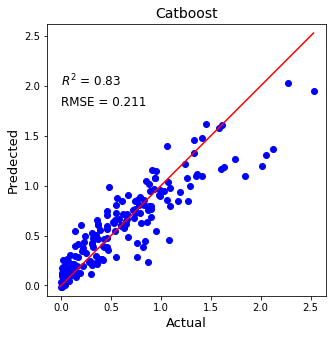

In [27]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.83', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.211', fontsize = 12)
plt.title('Catboost', fontsize = 14)
plt.show()

In [28]:
sorted_feature_importance = regressor.feature_importances_.argsort()

Text(0.5, 1.0, 'Feature Importance')

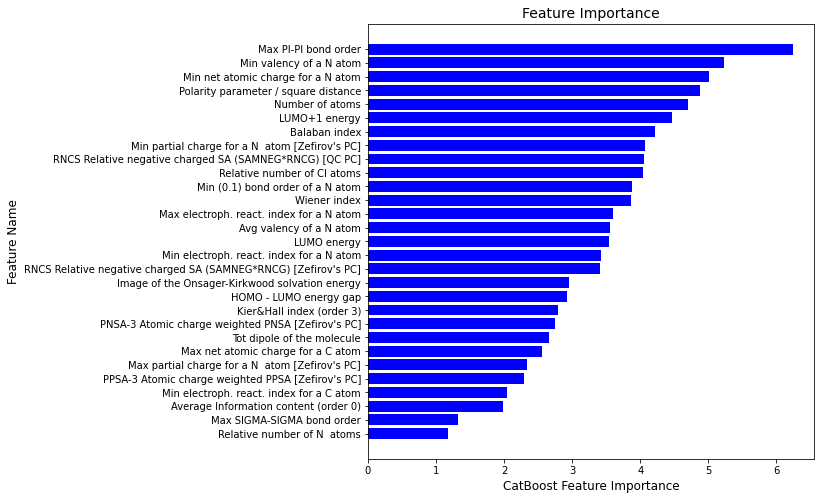

In [29]:
plt.figure(figsize=(8,8))
plt.barh(x.columns[sorted_feature_importance], 
        regressor.feature_importances_[sorted_feature_importance], align='center',alpha=1,
        color='blue')
plt.xlabel("CatBoost Feature Importance", fontsize = 12)
plt.ylabel("Feature Name", fontsize = 12)
plt.title('Feature Importance', fontsize = 14)

In [30]:
import shap

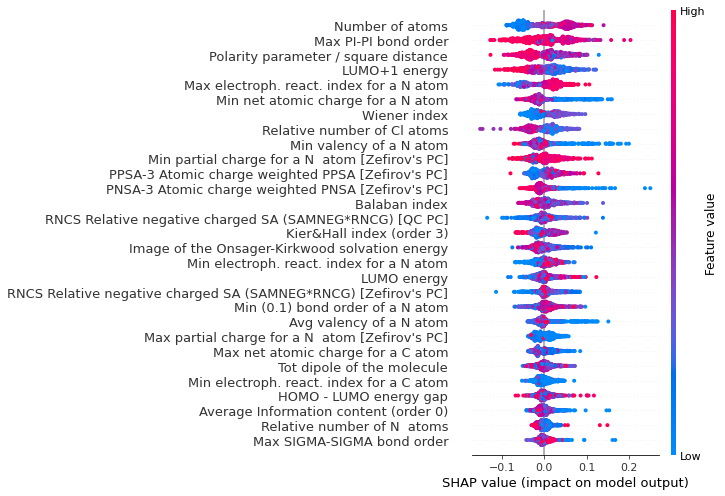

In [31]:
explainer = shap.TreeExplainer(regressor)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, x.columns, show = False, plot_size=[10,7], max_display=x_train.shape[0])
plt.gcf().set_size_inches(10,7)

In [32]:
shap_values

array([[-0.05263258, -0.01888264, -0.03586666, ...,  0.00033215,
        -0.00249945, -0.02175835],
       [-0.05007624, -0.01876914, -0.03824622, ..., -0.01179014,
        -0.01214675, -0.00380804],
       [ 0.0812349 ,  0.03024654,  0.04770905, ...,  0.10352746,
         0.06525043,  0.00437493],
       ...,
       [-0.06022578, -0.02791816, -0.02890881, ..., -0.03492721,
        -0.01459614, -0.02103986],
       [ 0.04265492,  0.01115011,  0.01494777, ..., -0.00750192,
        -0.00947154,  0.00860009],
       [ 0.0548065 ,  0.00330857,  0.0040391 , ..., -0.04171198,
        -0.01268502,  0.00998218]])

In [33]:
shap_values.shape

(844, 29)

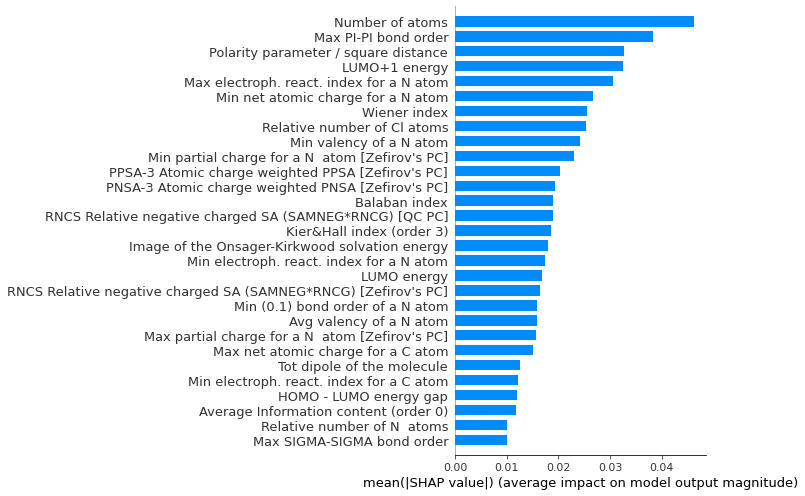

In [34]:
shap.summary_plot(shap_values, x_train,x.columns, plot_type="bar", max_display=x.shape[1], plot_size=[10,7])

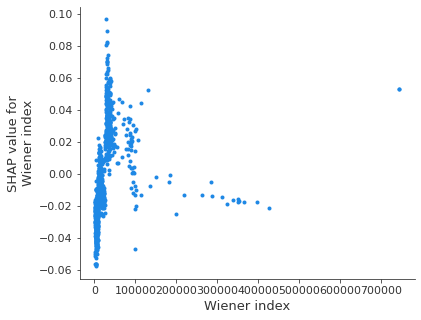

In [35]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index=None)

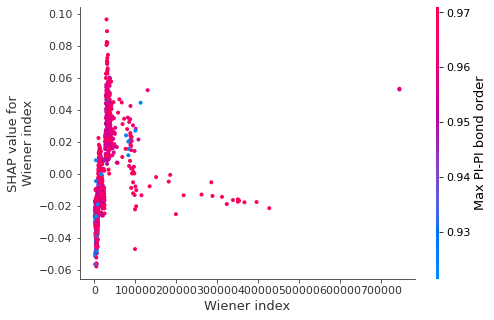

In [36]:
shap.dependence_plot("Wiener index", shap_values, x_train, x.columns, interaction_index="auto")

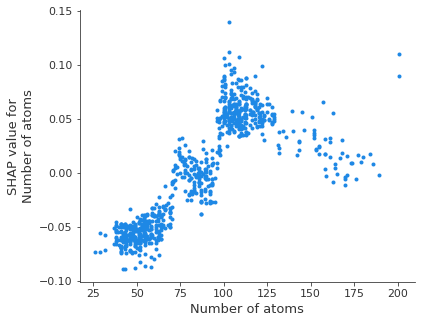

In [37]:
shap.dependence_plot("Number of atoms", shap_values, x_train, x.columns, interaction_index=None)

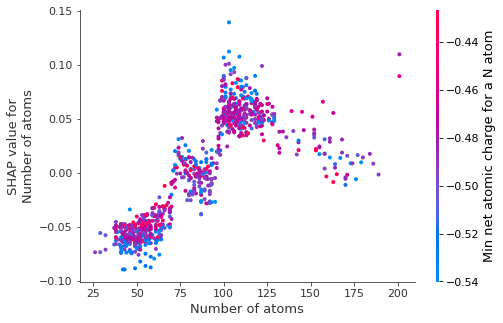

In [38]:
shap.dependence_plot("Number of atoms", shap_values, x_train, x.columns, interaction_index="auto")

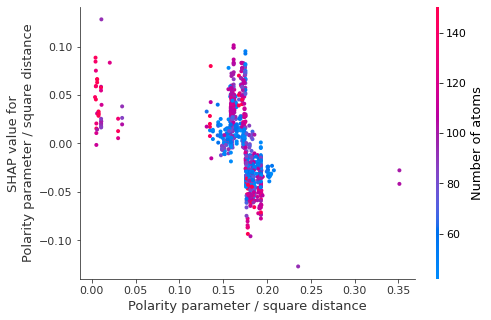

In [39]:
shap.dependence_plot("Polarity parameter / square distance", shap_values, x_train, x.columns, interaction_index="auto")

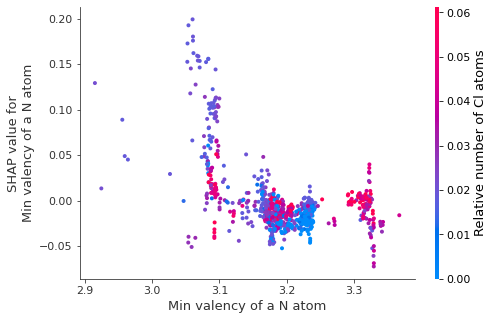

In [40]:
shap.dependence_plot("Min valency of a N atom", shap_values, x_train, x.columns, interaction_index="auto")

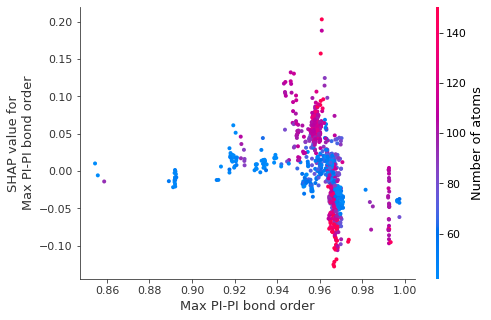

In [41]:
shap.dependence_plot("Max PI-PI bond order", shap_values, x_train, x.columns, interaction_index="auto")

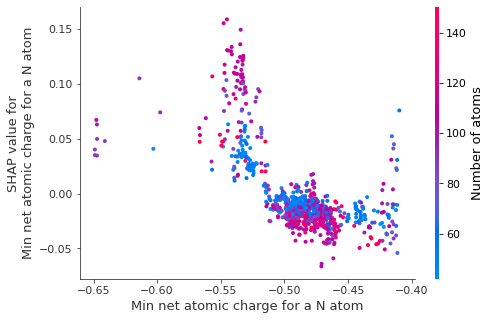

In [42]:
shap.dependence_plot("Min net atomic charge for a N atom", shap_values, x_train, x.columns, interaction_index="auto")

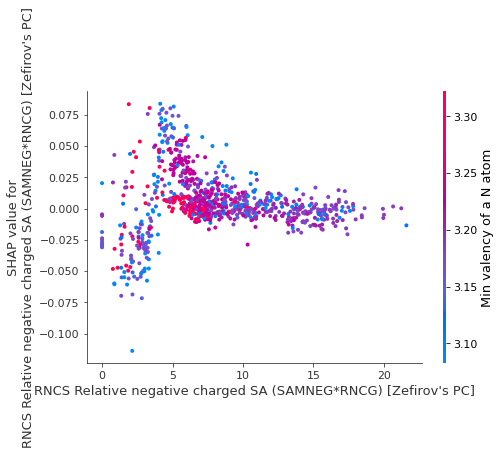

In [43]:
shap.dependence_plot("RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto")

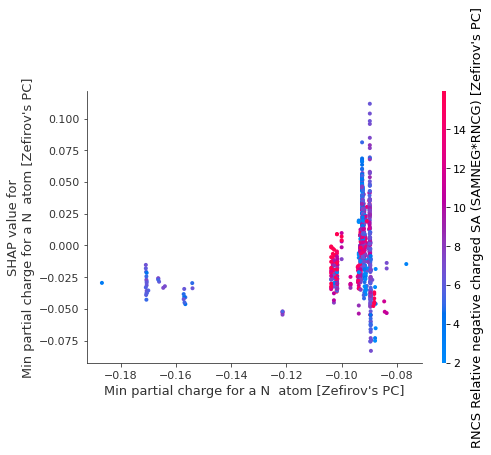

In [44]:
shap.dependence_plot("Min partial charge for a N  atom [Zefirov's PC]", shap_values, x_train, x.columns, interaction_index="auto") 

In [45]:
# parameter tuning grid searchCV
from sklearn.model_selection import GridSearchCV

In [46]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

In [48]:
regressor_grid = GridSearchCV(estimator =regressor, param_grid=grid,
                              cv = 5, verbose =2,
                              n_jobs= -1,  scoring = "neg_mean_squared_error")



In [49]:
regressor_grid.fit (x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
0:	learn: 0.4591065	total: 40.2ms	remaining: 7.99s
1:	learn: 0.4399289	total: 70.1ms	remaining: 6.94s
2:	learn: 0.4234998	total: 96.7ms	remaining: 6.35s
3:	learn: 0.4042042	total: 126ms	remaining: 6.15s
4:	learn: 0.3879508	total: 154ms	remaining: 6s
5:	learn: 0.3735780	total: 181ms	remaining: 5.84s
6:	learn: 0.3621499	total: 211ms	remaining: 5.81s
7:	learn: 0.3523379	total: 238ms	remaining: 5.7s
8:	learn: 0.3433225	total: 284ms	remaining: 6.02s
9:	learn: 0.3342054	total: 317ms	remaining: 6.02s
10:	learn: 0.3262572	total: 344ms	remaining: 5.91s
11:	learn: 0.3195190	total: 373ms	remaining: 5.84s
12:	learn: 0.3108094	total: 399ms	remaining: 5.74s
13:	learn: 0.3029837	total: 425ms	remaining: 5.65s
14:	learn: 0.2994629	total: 453ms	remaining: 5.59s
15:	learn: 0.2933785	total: 483ms	remaining: 5.55s
16:	learn: 0.2879667	total: 521ms	remaining: 5.61s
17:	learn: 0.2826710	total: 544ms	remaining: 5.5s
18:	learn: 0.2778379	total: 575m

166:	learn: 0.0621454	total: 4.34s	remaining: 858ms
167:	learn: 0.0614983	total: 4.38s	remaining: 833ms
168:	learn: 0.0611576	total: 4.4s	remaining: 808ms
169:	learn: 0.0607277	total: 4.43s	remaining: 782ms
170:	learn: 0.0602295	total: 4.46s	remaining: 756ms
171:	learn: 0.0596810	total: 4.48s	remaining: 729ms
172:	learn: 0.0591830	total: 4.5s	remaining: 702ms
173:	learn: 0.0588630	total: 4.52s	remaining: 676ms
174:	learn: 0.0583807	total: 4.54s	remaining: 649ms
175:	learn: 0.0578775	total: 4.58s	remaining: 624ms
176:	learn: 0.0572668	total: 4.6s	remaining: 598ms
177:	learn: 0.0570055	total: 4.62s	remaining: 571ms
178:	learn: 0.0566016	total: 4.64s	remaining: 545ms
179:	learn: 0.0563257	total: 4.67s	remaining: 519ms
180:	learn: 0.0555650	total: 4.69s	remaining: 492ms
181:	learn: 0.0552949	total: 4.71s	remaining: 466ms
182:	learn: 0.0549019	total: 4.73s	remaining: 440ms
183:	learn: 0.0545751	total: 4.76s	remaining: 414ms
184:	learn: 0.0543233	total: 4.79s	remaining: 388ms
185:	learn: 0.0

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x0000023F6099FDC0>,
             n_jobs=-1,
             param_grid={'depth': [2, 4, 6, 8], 'iterations': [100, 150, 200],
                         'l2_leaf_reg': [0.2, 0.5, 1, 3],
                         'learning_rate': [0.03, 0.1]},
             scoring='neg_mean_squared_error', verbose=2)

In [50]:
regressor_grid.best_params_

{'depth': 8, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

In [51]:
regressor_grid.best_score_

-0.07710489329113045